# Clustering Countries using Unsupervised Machine Learning

#### Problem statement:


HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.


### Data description

- Country: Name of the country
- Child_mort: Death of children under 5 years of age per 1000 live births
- Exports: Exports of goods and services per capita. Given as %age of the GDP per capita
- Health: Total health spending per capita. Given as %age of GDP per capita
- Imports: Imports of goods and services per capita. Given as %age of the GDP per capita
- Income: Net income per person
- Inflation: The measurement of the annual growth rate of the Total GDP
- Life_expec: The average number of years a new born child would live if the current mortality patterns are to rem...
- Total_fer: The number of children that would be born to each woman if the current age-fertility rates remain th...
- Gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population.


## ML Modeling


Building on the insights from EDA and hypothesis testing, we can leverage unsupervised learning techniques to categorize countries based on their socio-economic and health factors. This will help HELP International strategically allocate their $10 million aid to the countries in the direst need.


#### Data Preprocessing:
- Missing Value Imputation: Handle missing values in any column using techniques like mean/median imputation for numerical features and removal for outliers if missingness is low.
- Normalization: Standardize or normalize numerical features (e.g., Income, Exports) to ensure all features contribute equally to the clustering process.
- Encoding Categorical Variables: If any categorical variables exist (e.g., Region), encode them using one-hot encoding for compatibility with clustering algorithms.
- Feature Engineering: Create new features that might capture aspects of development:
- Indicators: Create binary features based on thresholds (e.g., "High_Child_Mortality" if Child_mortality rate exceeds a certain value).
- Ratios: Calculate ratios between features (e.g., Exports/Imports) to indicate economic dependence.


##### Model Selection:

Here, we'll focus on unsupervised learning algorithms for clustering countries based on their development needs:

- K-Means Clustering: A popular choice for grouping data points into a predefined number of clusters (k). This is effective when the number of clusters is known or can be estimated beforehand.
- Hierarchical Clustering: This method creates a hierarchy of clusters, allowing you to explore different levels of granularity and identify natural groupings in the data. It's helpful when the optimal number of clusters is unknown.
- DBSCAN (Density-Based Spatial Clustering of Applications with Noise): This algorithm can identify clusters of arbitrary shapes and handle outliers effectively, which might be relevant for countries with unique development challenges.

##### Model Training and Evaluation:
- Choosing the Right Number of Clusters (k): For K-Means, techniques like the Elbow Method or Silhouette Analysis can help determine the optimal number of clusters (k) that best captures the data's inherent groupings.
- Evaluation Metrics: Since we lack labeled data (developed vs. developing countries) for supervised learning, specific unsupervised evaluation metrics come into play:
- Silhouette Coefficient: Measures the average silhouette score for all data points, considering how well each point is assigned to its cluster compared to neighboring clusters. Higher scores indicate better clustering.
Visualization: Visualize the clusters using techniques like scatter plots with dimensionality reduction (e.g., PCA) to understand the separation and distribution of countries within each cluster.



## Importing libraries:

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("Country-data.csv",\
                        index_col='country')
df.head()

child_mort  exports  health  imports  income  inflation  \
country                                                                        
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   

                     life_expec  total_fer   gdpp  
country                                            
Afghanistan                56.2       5.82    553  
Albania                    76.3       1.65   4090  
Algeria                    76.5       2.89   4460  
Angola                     60.1       6.16   3530  
Antigua and Barbuda        76.8       2.13  12200

In [5]:
df.tail()

child_mort  exports  health  imports  income  inflation  \
country                                                              
Vanuatu          29.2     46.6    5.25     52.7    2950       2.62   
Venezuela        17.1     28.5    4.91     17.6   16500      45.90   
Vietnam          23.3     72.0    6.84     80.2    4490      12.10   
Yemen            56.3     30.0    5.18     34.4    4480      23.60   
Zambia           83.1     37.0    5.89     30.9    3280      14.00   

           life_expec  total_fer   gdpp  
country                                  
Vanuatu          63.0       3.50   2970  
Venezuela        75.4       2.47  13500  
Vietnam          73.1       1.95   1310  
Yemen            67.5       4.67   1310  
Zambia           52.0       5.40   1460

In [6]:
df.shape

(167, 9)

In [7]:
df.dtypes

child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [8]:
df.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')



The dataset includes **9 features with information on 167 countries**. 
Features are as follows:
* child_mort: death of children under 5 years of age per 1,000 live births
* exports: exports of goods and services per capita. Given as % of the GDP per capita.
* health: total health-related spending per capita. Given as % of GDP per capita.
* imports: imports of goods and services per capita. Given as % of the GDP per capita.
* income: net income per person.
* Inflation: rate of increase in prices and fall in the purchasing value of money.
* life_expec: the average number of years a new born child would live if the current mortality patterns are to remain the same.
* total_fer: the number of children that would be born to each woman if the current age-fertility rates remain the same.
* gdpp: the GDP per capita in USD (GDP divided by the total population).  



In [9]:
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

After checking general dataset stats, we can confirm the dataset contain valid data:
+ Average life expectancy: 70.5 years
+ Average child mortality rate (per 1,000 live births): 38.3
+ Average fertility rate: 2.9
* Median fertility rate: 2.4
+ Average GDP per capita: 12,964 USD
* Average Income: 17,145 USD

###  Data Cleaning <a name=cleaning></a>

In [11]:
# Looking for duplicates
print('Number of duplicate observations in the dataset:', df.duplicated().sum())

Number of duplicate observations in the dataset: 0


In [12]:
# Looking for missing values
for col in df.columns:
    print('{} - missing Values: {}'.format(col, df[col].isnull().sum()))

child_mort - missing Values: 0
exports - missing Values: 0
health - missing Values: 0
imports - missing Values: 0
income - missing Values: 0
inflation - missing Values: 0
life_expec - missing Values: 0
total_fer - missing Values: 0
gdpp - missing Values: 0


In [29]:
# Looking for outliers
def outlier_visualizer(col, vert=True, grid=True):
    
    (df[col].plot(kind='box',vert=vert))
    plt.title('{} - Boxplot'.format(col))
    plt.ylabel('Values')
    plt.grid(grid)
    plt.show()
    
def outlier_finder(col):
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = q3 - q1
    left_lim = q1 - iqr*1.5
    right_lim = q3 + iqr*1.5
    outliers = {'country':[], col:[]}

    for i,c in enumerate(df[col]):
        if c < left_lim:
            outliers['country'].append(df[col].index[i])
            outliers[col].append(c)
        elif c > right_lim:
            outliers['country'].append(df[col].index[i])
            outliers[col].append(c)
        
    outliers_df = pd.DataFrame(outliers)
    outliers_df.set_index('country', inplace=True)
    
    print('{} - % of outliers: {}%'.format(col, round(outliers_df.shape[0]/df.shape[0]*100,2)))
    return outliers_df

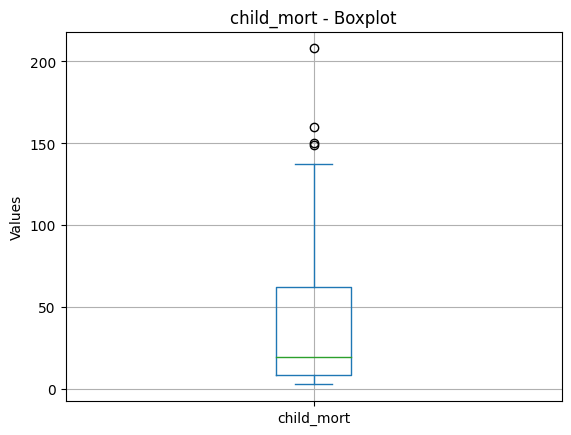

In [31]:
outlier_visualizer('child_mort')

In [12]:
outlier_finder('child_mort')

child_mort - % of outliers: 2.4%


child_mort
country                             
Central African Republic       149.0
Chad                           150.0
Haiti                          208.0
Sierra Leone                   160.0

child_mort outliers seem to be correct observations.

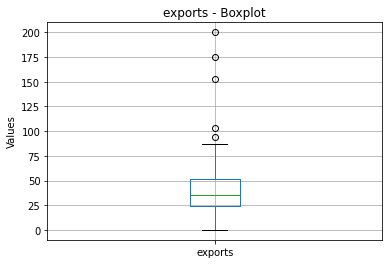

In [13]:
outlier_visualizer('exports')

In [14]:
outlier_finder('exports')

exports - % of outliers: 2.99%


exports
country            
Ireland       103.0
Luxembourg    175.0
Malta         153.0
Seychelles     93.8
Singapore     200.0

exports outliers, after cross checking the export rate of those countries (as % of the GDP per capita) on the Internet, seem to be correct observations.

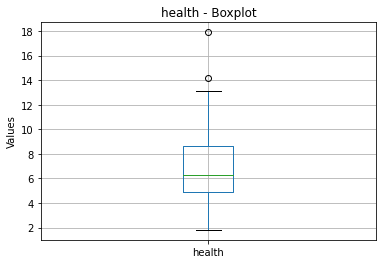

In [15]:
outlier_visualizer('health')

In [16]:
outlier_finder('health')

health - % of outliers: 1.2%


health
country                      
Micronesia, Fed. Sts.    14.2
United States            17.9

health outliers, after cross checking the export rate of those countries (as % of the GDP per capita) on the Internet, seem to be correct observations.

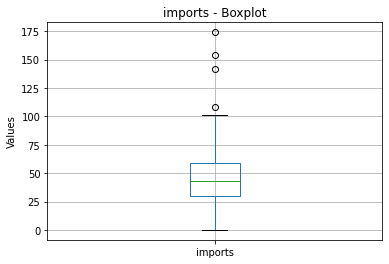

In [17]:
outlier_visualizer('imports')

In [18]:
outlier_finder('imports')

imports - % of outliers: 2.4%


imports
country            
Luxembourg    142.0
Malta         154.0
Seychelles    108.0
Singapore     174.0

imports outliers, after cross checking the export rate of those countries (as % of the GDP per capita) on the Internet, seem to be correct observations.

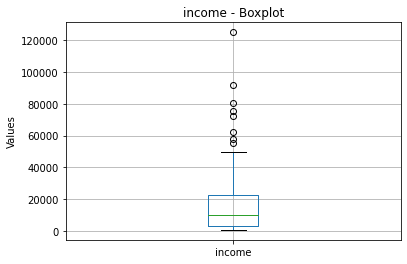

In [19]:
outlier_visualizer('income')

In [20]:
outlier_finder('income')

income - % of outliers: 4.79%


income
country                     
Brunei                 80600
Kuwait                 75200
Luxembourg             91700
Norway                 62300
Qatar                 125000
Singapore              72100
Switzerland            55500
United Arab Emirates   57600

The 8 income outliers seem to be correct observations, considering that all these countries are very high-income nations.

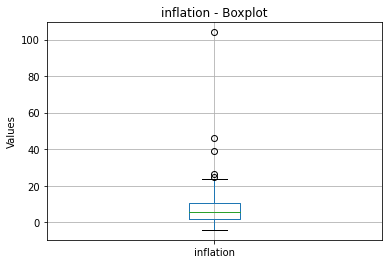

In [21]:
outlier_visualizer('inflation')

In [22]:
outlier_finder('inflation')

inflation - % of outliers: 2.99%


inflation
country                     
Equatorial Guinea       24.9
Mongolia                39.2
Nigeria                104.0
Timor-Leste             26.5
Venezuela               45.9

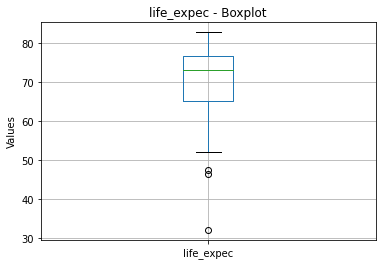

In [23]:
outlier_visualizer('life_expec')

In [24]:
outlier_finder('life_expec')

life_expec - % of outliers: 1.8%


life_expec
country                             
Central African Republic        47.5
Haiti                           32.1
Lesotho                         46.5

life_expec outliers seem to be correct observations.

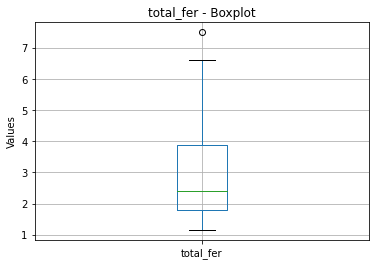

In [25]:
outlier_visualizer('total_fer')

In [26]:
outlier_finder('total_fer')

total_fer - % of outliers: 0.6%


total_fer
country           
Niger         7.49

Niger, the only outlier in this attribute, seems to be a correct observation (I checked the fertility rate of the country on the Internet)

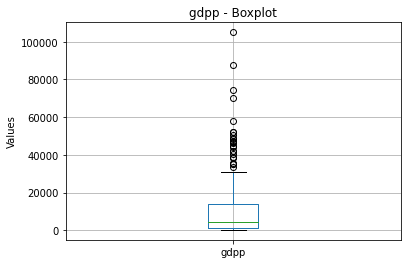

In [27]:
outlier_visualizer('gdpp')

In [28]:
outlier_finder('gdpp')

gdpp - % of outliers: 14.97%


gdpp
country                     
Australia              51900
Austria                46900
Belgium                44400
Brunei                 35300
Canada                 47400
Denmark                58000
Finland                46200
France                 40600
Germany                41800
Iceland                41900
Ireland                48700
Italy                  35800
Japan                  44500
Kuwait                 38500
Luxembourg            105000
Netherlands            50300
New Zealand            33700
Norway                 87800
Qatar                  70300
Singapore              46600
Sweden                 52100
Switzerland            74600
United Arab Emirates   35000
United Kingdom         38900
United States          48400

In [32]:
print('Numbers of gdpp outliers: ',len(outlier_finder('gdpp')))

gdpp - % of outliers: 14.97%
Numbers of gdpp outliers:  25


The 25 gdpp outliers are all 1st-world countries: we can  consider the observations as correct. 

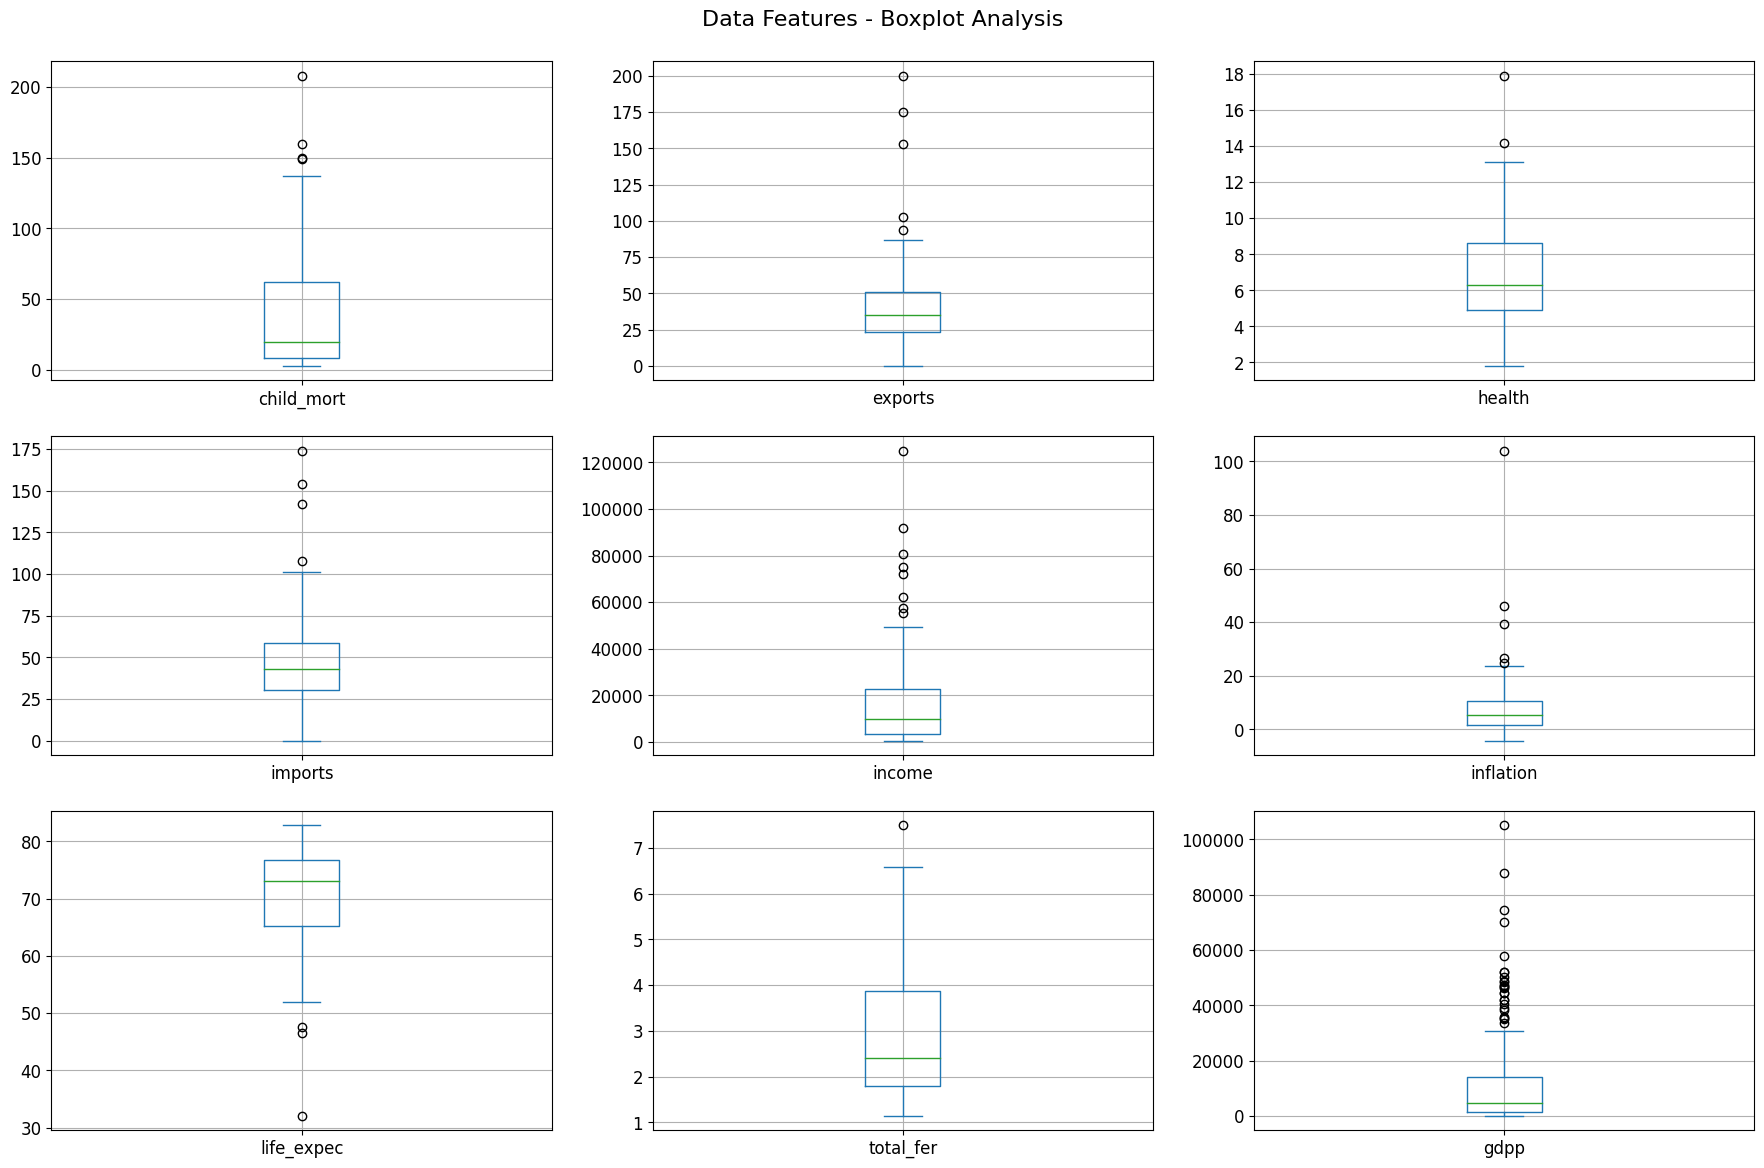

In [34]:
fig = plt.figure(figsize=(18,12))
child_mort = fig.add_subplot(3,3,1)
exports = fig.add_subplot(3,3,2)
health = fig.add_subplot(3,3,3)
imports = fig.add_subplot(3,3,4)
income = fig.add_subplot(3,3,5)
inflation = fig.add_subplot(3,3,6)
life_expec = fig.add_subplot(3,3,7)
total_fer = fig.add_subplot(3,3,8)
gdpp = fig.add_subplot(3,3,9)

df['child_mort'].plot(kind='box', fontsize=12, ax=child_mort)
child_mort.grid(True)
df['exports'].plot(kind='box', fontsize=12,ax=exports)
exports.grid(True)
df['health'].plot(kind='box', fontsize=12,ax=health)
health.grid(True)
df['imports'].plot(kind='box', fontsize=12,ax=imports)
imports.grid(True)
df['income'].plot(kind='box', fontsize=12,ax=income)
income.grid(True)
df['inflation'].plot(kind='box', fontsize=12,ax=inflation)
inflation.grid(True)
df['life_expec'].plot(kind='box', fontsize=12,ax=life_expec)
life_expec.grid(True)
df['total_fer'].plot(kind='box', fontsize=12,ax=total_fer)
total_fer.grid(True)
df['gdpp'].plot(kind='box', fontsize=12,ax=gdpp)
gdpp.grid(True)

fig.suptitle('Data Features - Boxplot Analysis', fontsize=16)
plt.tight_layout(pad=2)
plt.show()

### Exploratory Data Analysis <a name=eda></a>

In [35]:
df.describe(include='all')

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

Some variables are on a very different scale; before modelling, I'll normalize the data to bring all variables on the same scale to avoid the features with the highest scale to dominate the clustering algorithms.

Let's look into the distribution and feature correlation of our data.

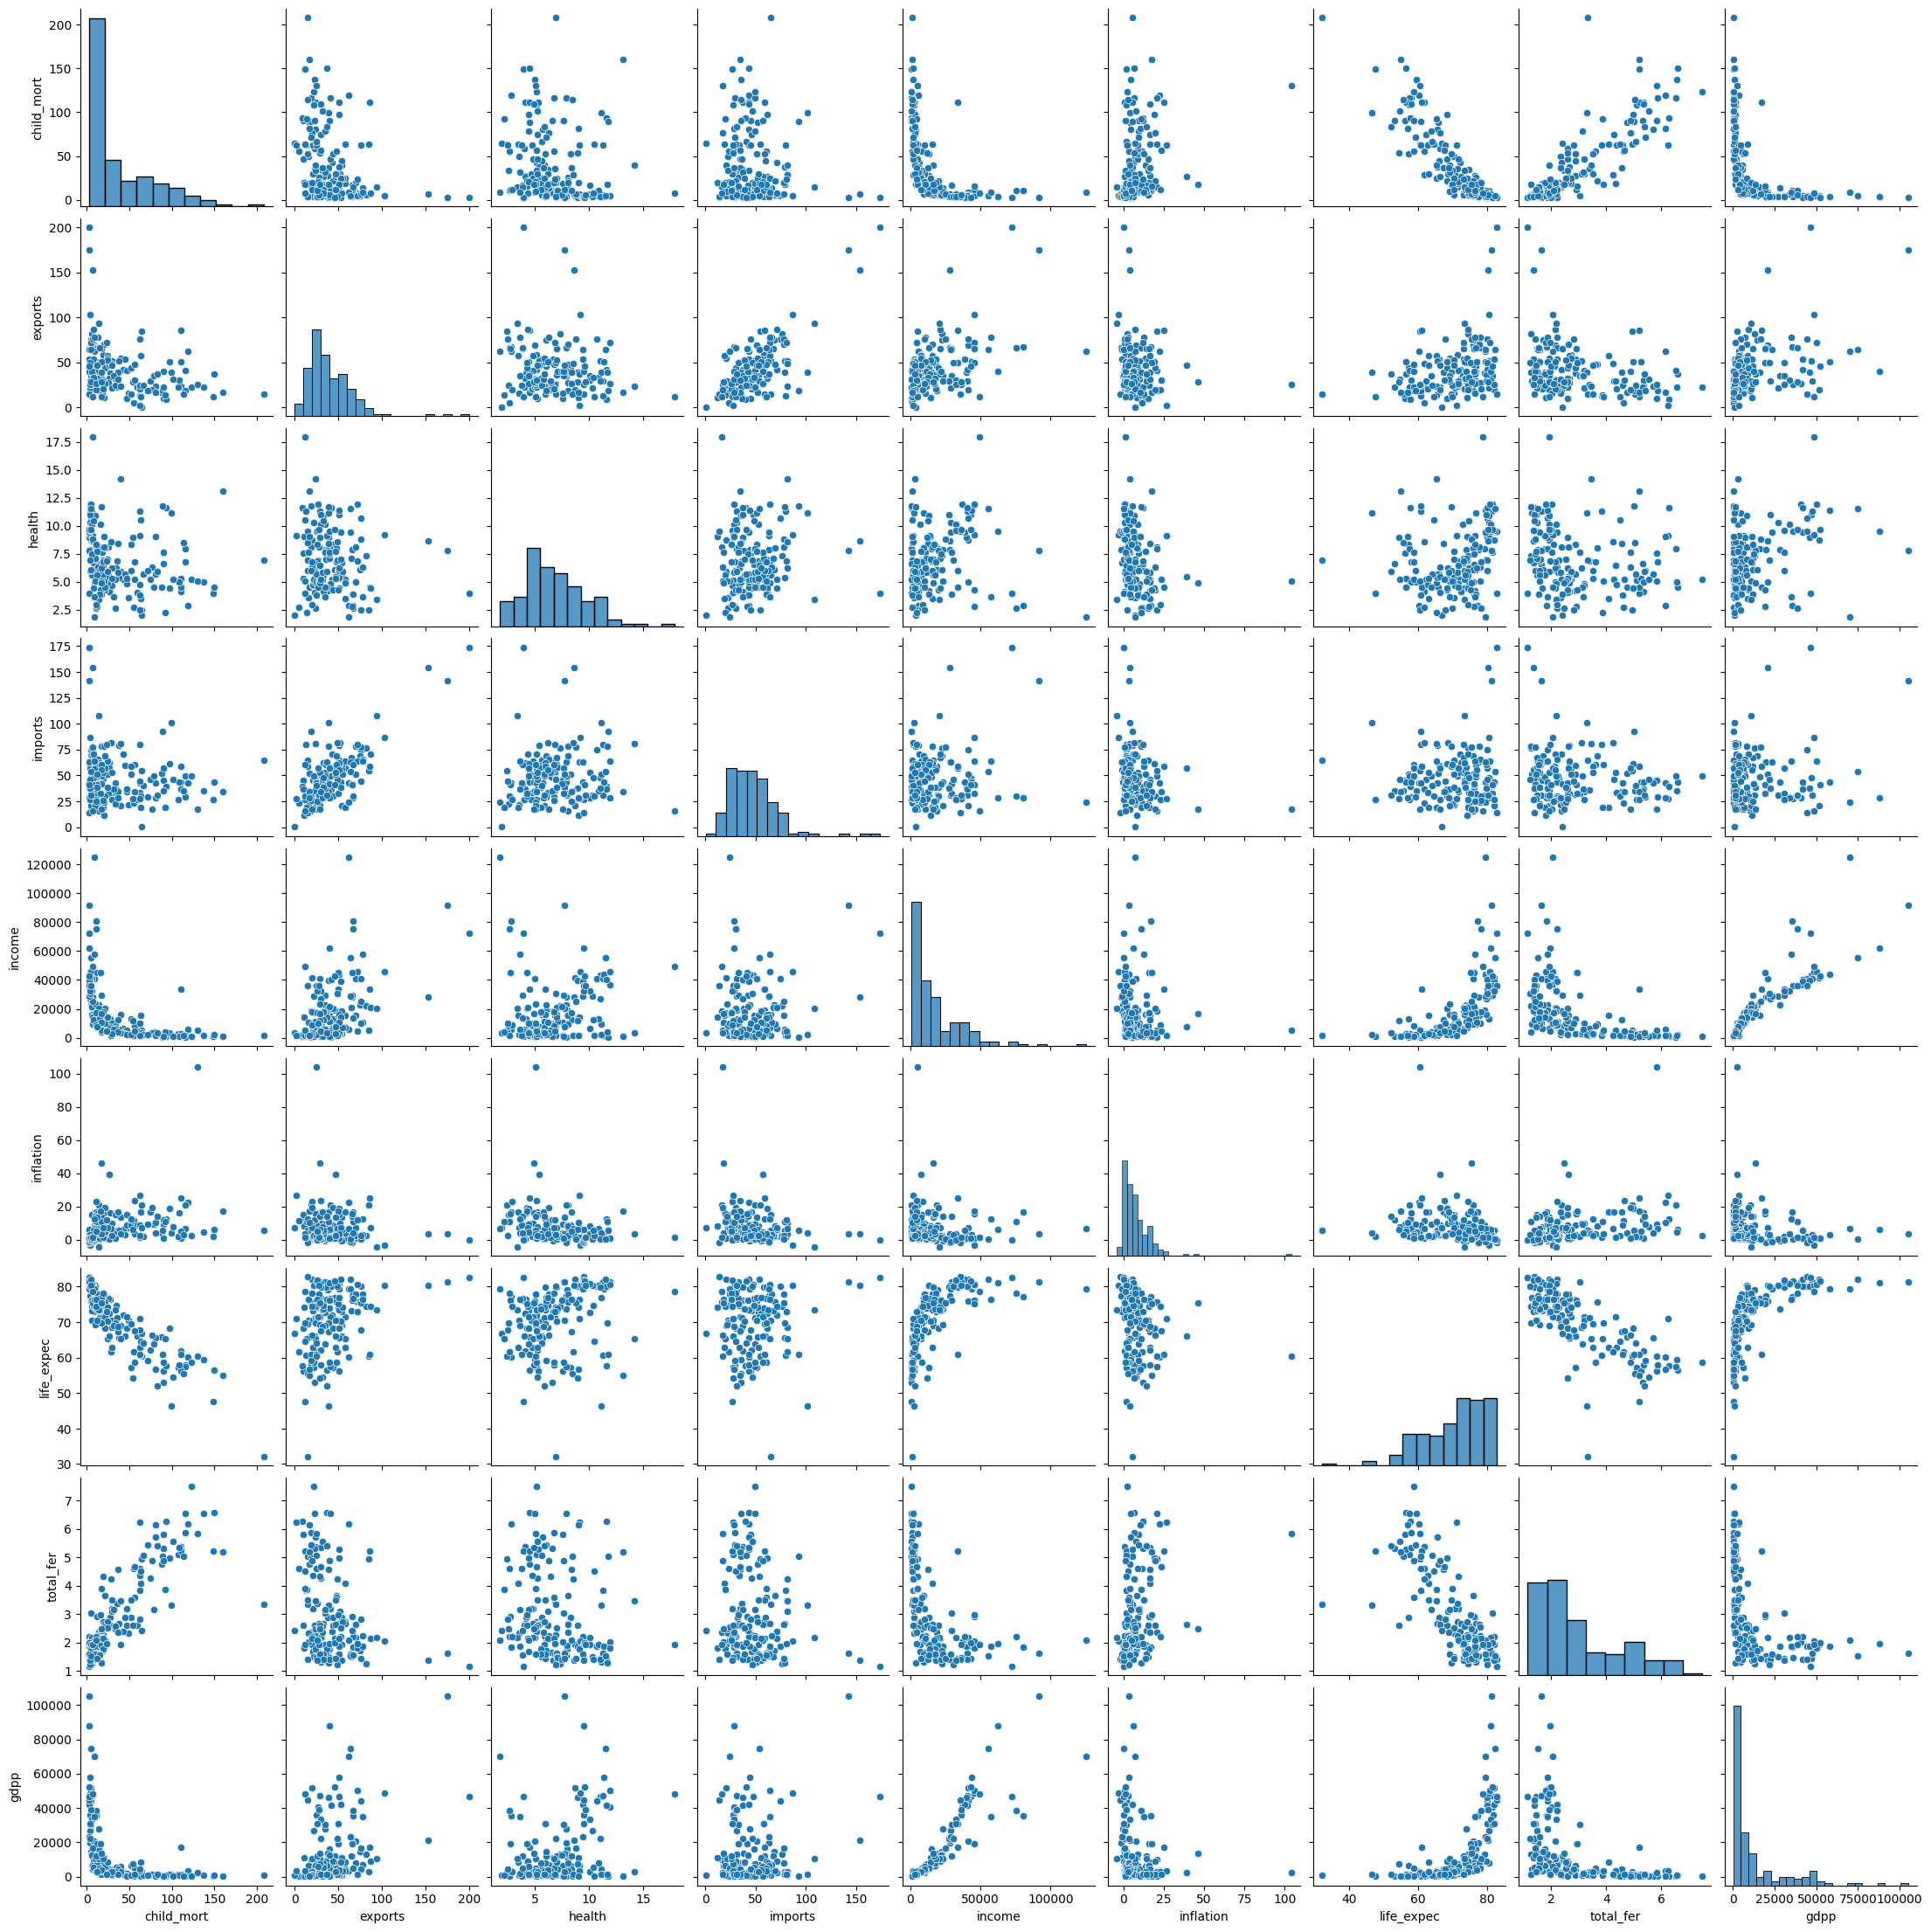

In [ ]:
sns.pairplot(df)
plt.show()

##### Distribution
Some of the features seem to be quite right-skewed:
* child_mort
* exports
* imports
* income
* inflation
* total_fer
* gdpp

1 feature seem to be left-skewed:
* left_expec

The remaining features seem to have a more or less normal distribution:
* health

In [37]:
# let's check variable skewness
df.skew()

child_mort    1.450774
exports       2.445824
health        0.705746
imports       1.905276
income        2.231480
inflation     5.154049
life_expec   -0.970996
total_fer     0.967092
gdpp          2.218051
dtype: float64

In [38]:
def norm_check(data):
    for var in range(len(data.skew())):
        if abs(data.skew()[var]) > 0.75:
            print('"{}" skew: {}. The variable is NOT normally distributed.'.format(data.skew().index[var],
                                                                                    round(data.skew()[var],2)))
        else:
            print('"{}" skew: {}. The Variable is normally distributed'.format(data.skew().index[var],
                                                                                round(data.skew()[var],2)))
            
norm_check(df)

"child_mort" skew: 1.45. The variable is NOT normally distributed.
"exports" skew: 2.45. The variable is NOT normally distributed.
"health" skew: 0.71. The Variable is normally distributed
"imports" skew: 1.91. The variable is NOT normally distributed.
"income" skew: 2.23. The variable is NOT normally distributed.
"inflation" skew: 5.15. The variable is NOT normally distributed.
"life_expec" skew: -0.97. The variable is NOT normally distributed.
"total_fer" skew: 0.97. The variable is NOT normally distributed.
"gdpp" skew: 2.22. The variable is NOT normally distributed.


##### Correlation
There seems to be a linear correlation (either positive or negative) between several features:
* child_mort and life_expec
* total_fer and child_mort
* exports and imports
* income and gdpp
* life_expec and total_fer

In [39]:
df.corr()

child_mort   exports    health   imports    income  inflation  \
child_mort    1.000000 -0.318093 -0.200402 -0.127211 -0.524315   0.288276   
exports      -0.318093  1.000000 -0.114408  0.737381  0.516784  -0.107294   
health       -0.200402 -0.114408  1.000000  0.095717  0.129579  -0.255376   
imports      -0.127211  0.737381  0.095717  1.000000  0.122406  -0.246994   
income       -0.524315  0.516784  0.129579  0.122406  1.000000  -0.147756   
inflation     0.288276 -0.107294 -0.255376 -0.246994 -0.147756   1.000000   
life_expec   -0.886676  0.316313  0.210692  0.054391  0.611962  -0.239705   
total_fer     0.848478 -0.320011 -0.196674 -0.159048 -0.501840   0.316921   
gdpp         -0.483032  0.418725  0.345966  0.115498  0.895571  -0.221631   

            life_expec  total_fer      gdpp  
child_mort   -0.886676   0.848478 -0.483032  
exports       0.316313  -0.320011  0.418725  
health        0.210692  -0.196674  0.345966  
imports       0.054391  -0.159048  0.115498  
income        0.611962  -0.501840  0.895571  
inflation    -0.239705   0.316921 -0.221631  
life_expec    1.000000  -0.760875  0.600089  
total_fer    -0.760875   1.000000 -0.454910  
gdpp          0.600089  -0.454910  1.000000

In [40]:
# I'll create a function to check which feature are lineraly correlated and what is the correlation coefficient
def corr_matrix(data):
    corr_matrix = data.corr()
    
    for var in corr_matrix.columns:
        corr_matrix[var] = corr_matrix[var].apply(lambda x:x if abs(x) > 0.70 and abs(x) < 1 else '')
    
    return corr_matrix

In [42]:
corr_matrix(df)

child_mort   exports health   imports    income inflation  \
child_mort                                                             
exports                                 0.737381                       
health                                                                 
imports                0.737381                                        
income                                                                 
inflation                                                              
life_expec  -0.886676                                                  
total_fer    0.848478                                                  
gdpp                                              0.895571             

           life_expec total_fer      gdpp  
child_mort  -0.886676  0.848478            
exports                                    
health                                     
imports                                    
income                           0.895571  
inflation                                  
life_expec            -0.760875            
total_fer   -0.760875                      
gdpp

The only normally distributed variable is: health. The correlation matrix confirmed the results from the pairplots inspection.  
Let's apply several transformations to bring the data into the Gaussian distribution.

### Feature Engineering and Variable Transformations <a name=engineering></a>

#### BoxCox Transformation

In [95]:
# Create a function to apply several transformations
def transformer(data,function):
    lam = []
    for col in data.columns:
        if abs(data[col].skew()) > 0.75:
            if function == boxcox:
                data[col], lam_val = function(data[col] + abs(df.min().min())+0.001)
                lam.append(lam_val)
            else:
                data[col] = function(data[col] + abs(df.min().min())+0.001)
                # inflation is the only feature with negative values; to make the log transform possible,
                ## I added the lowest value of inflation +0.001 to make all values positive
    if function == boxcox:
        return data, lam
    else:
        return data

In [96]:
bc_data = df.copy() 
bc_data, lambda_list = transformer(bc_data, boxcox) #storing the lambda values of boxcox transform in a separate list
bc_data.skew()

child_mort    0.062932
exports       0.030569
health        0.705746
imports       0.069233
income       -0.035718
inflation     0.418363
life_expec   -0.182171
total_fer     0.199942
gdpp          0.001558
cluster       0.328943
dtype: float64

In [97]:
norm_check(bc_data)

"child_mort" skew: 0.06. The Variable is normally distributed
"exports" skew: 0.03. The Variable is normally distributed
"health" skew: 0.71. The Variable is normally distributed
"imports" skew: 0.07. The Variable is normally distributed
"income" skew: -0.04. The Variable is normally distributed
"inflation" skew: 0.42. The Variable is normally distributed
"life_expec" skew: -0.18. The Variable is normally distributed
"total_fer" skew: 0.2. The Variable is normally distributed
"gdpp" skew: 0.0. The Variable is normally distributed
"cluster" skew: 0.33. The Variable is normally distributed


Pairplot - Data BoxCox Transformed


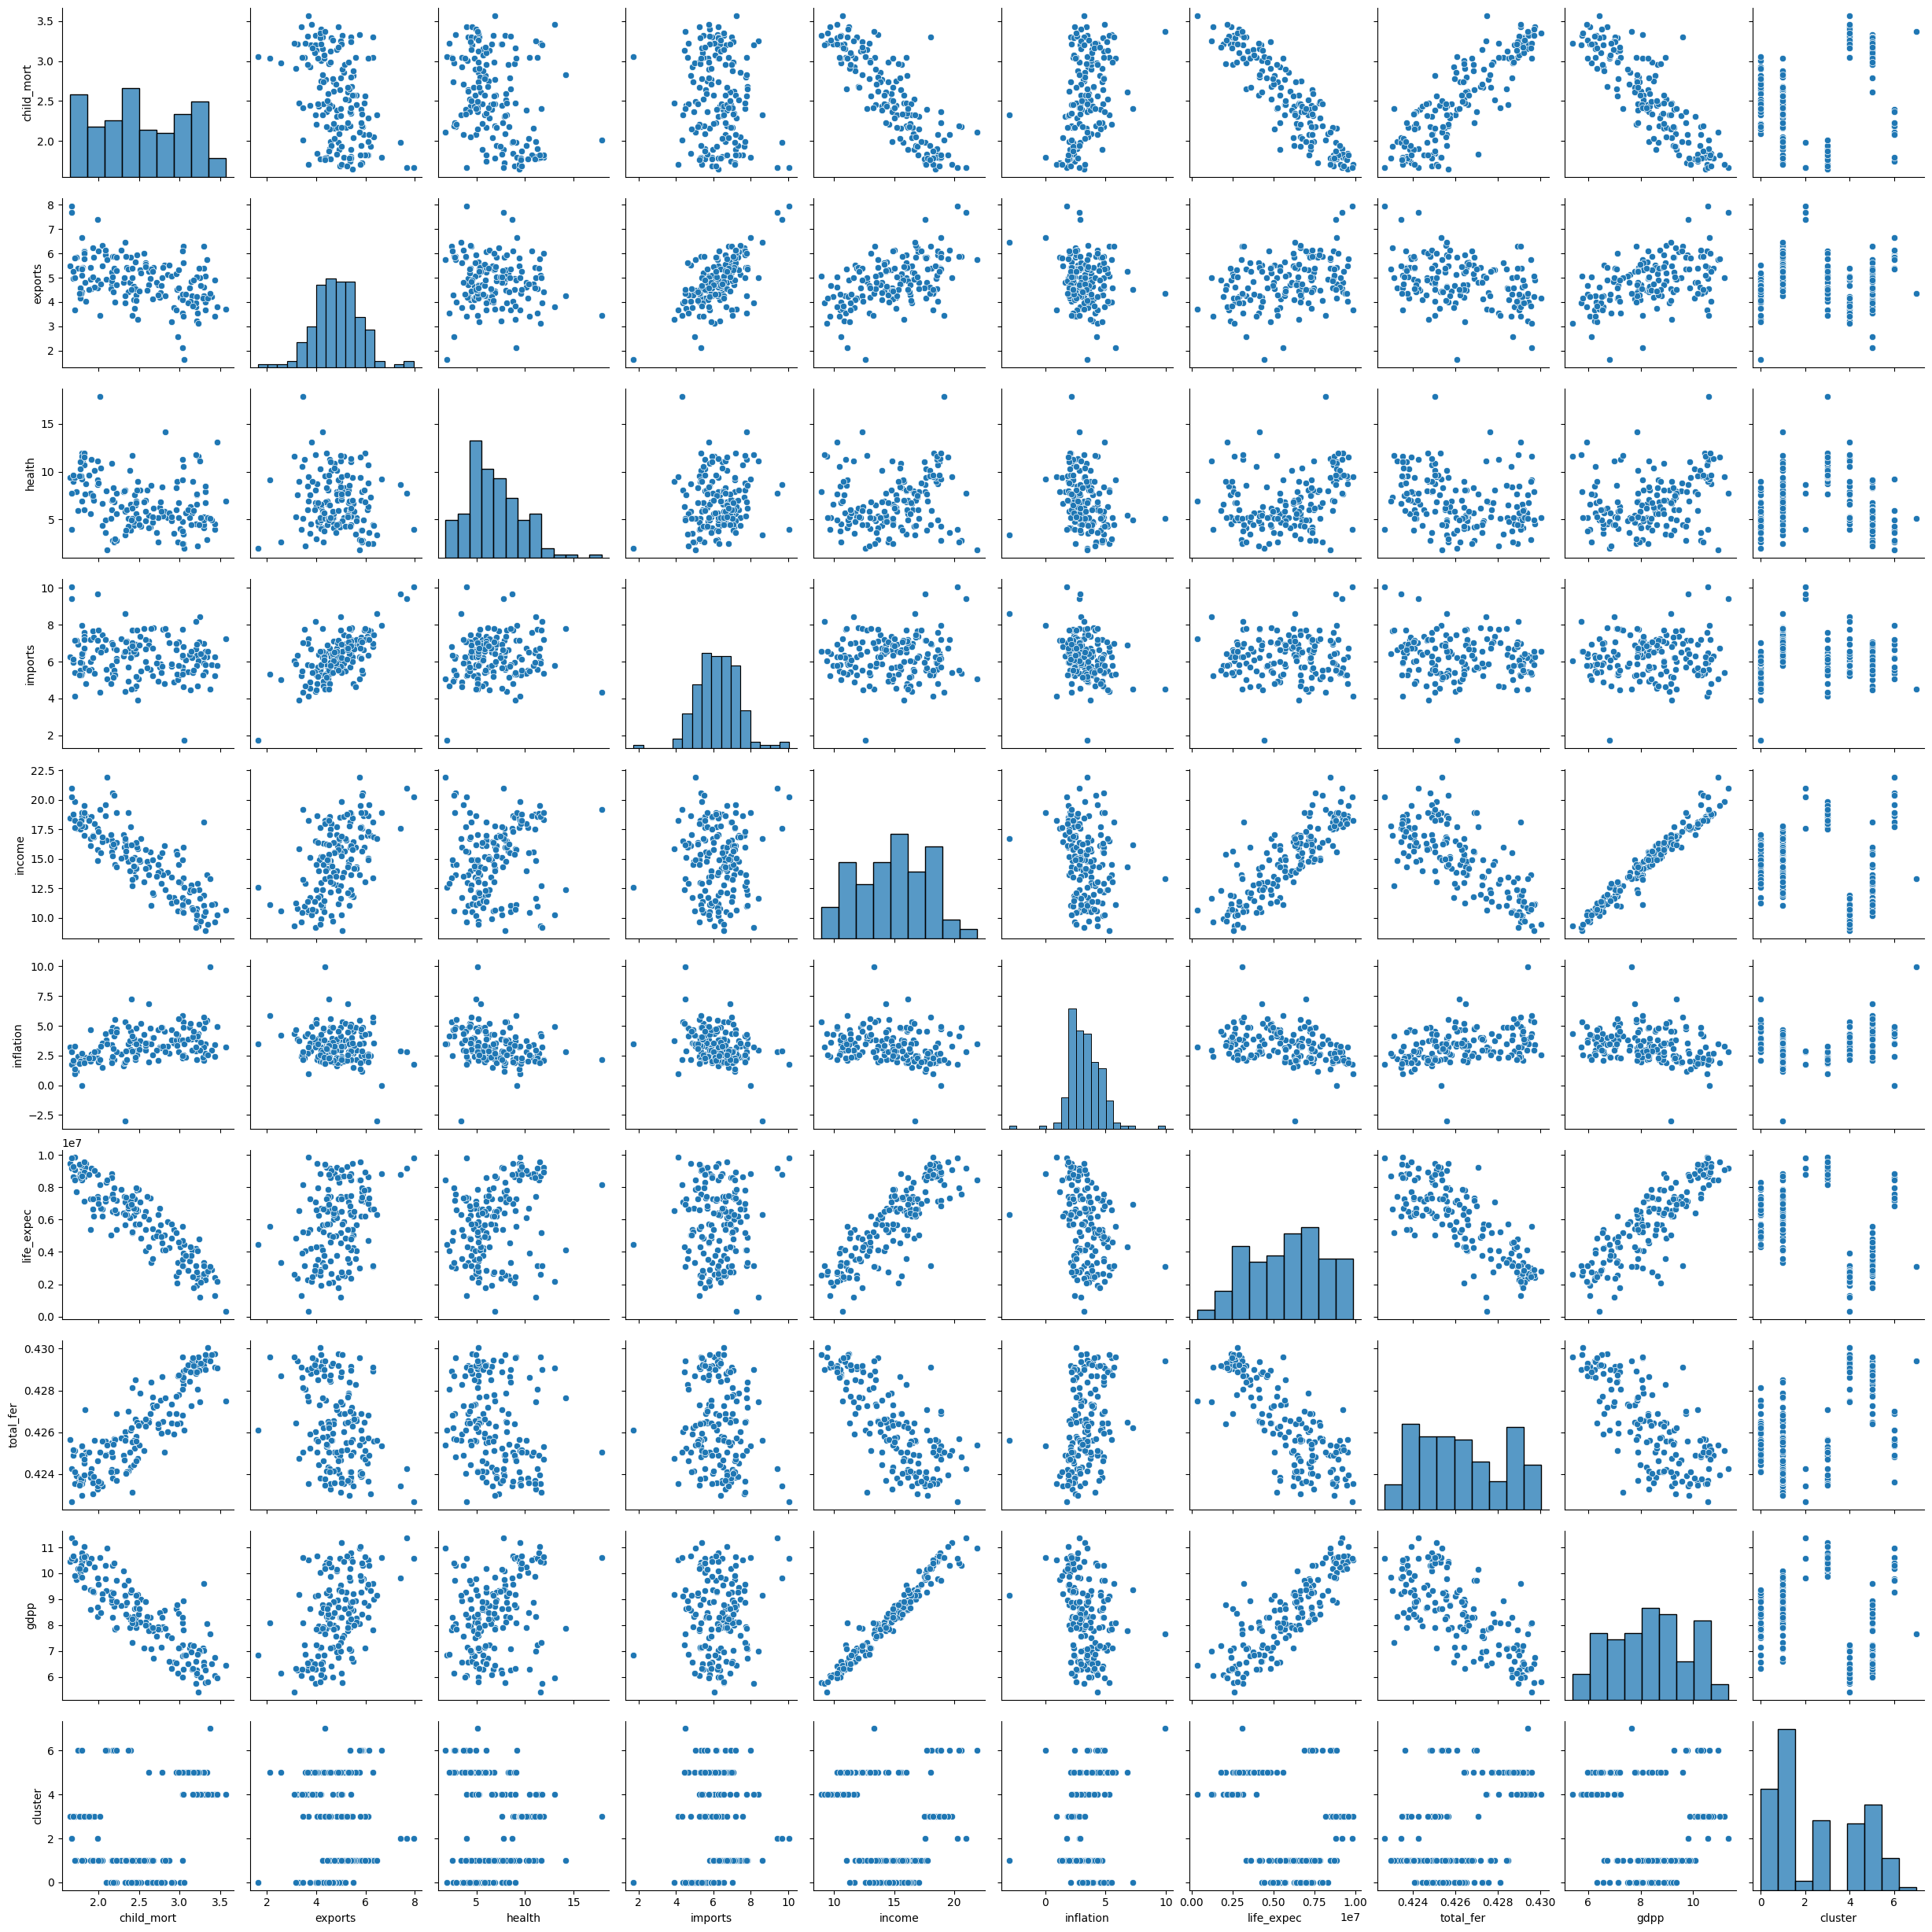

In [ ]:
print('Pairplot - Data BoxCox Transformed')
sns.pairplot(bc_data)
plt.show()

In [99]:
print('Correlation Matrix - Data BoxCox Transformed')
corr_matrix(bc_data)

Correlation Matrix - Data BoxCox Transformed


child_mort exports health imports    income inflation life_expec  \
child_mort                                   -0.858853            -0.913547   
exports                                                                       
health                                                                        
imports                                                                       
income      -0.858853                                              0.838438   
inflation                                                                     
life_expec  -0.913547                         0.838438                        
total_fer     0.87042                        -0.750676            -0.786441   
gdpp        -0.875005                         0.974396             0.849259   
cluster                                                                       

           total_fer      gdpp cluster  
child_mort   0.87042 -0.875005          
exports                                 
health                                  
imports                                 
income     -0.750676  0.974396          
inflation                               
life_expec -0.786441  0.849259          
total_fer            -0.733234          
gdpp       -0.733234                    
cluster

In [52]:
for c in comp_matrix.columns:
    comp_matrix[c] = comp_matrix[c].apply(lambda x:np.nan if x == '' else x)
    
boxcox=[]
log=[]
sqrt=[]

for col in comp_matrix.columns:
    try:
        boxcox.append(comp_matrix[col].value_counts().loc['boxcox'])
    except:
        boxcox.append(0)
    try:
        log.append(comp_matrix[col].value_counts().loc['log'])
    except:
        log.append(0)
    try:
        sqrt.append(comp_matrix[col].value_counts().loc['sqrt'])
    except:
        log.append(0)
print('Boxcox Transformation highest correlation coefficients:', int(sum(boxcox)/2))
print('Log Transformation highest correlation coefficient:', int(sum(log)/2))
print('Square Root Transformation highest correlation coefficient:', int(sum(sqrt)/2))

Boxcox Transformation highest correlation coefficients: 6
Log Transformation highest correlation coefficient: 3
Square Root Transformation highest correlation coefficient: 1


The BoxCox Transformation proved to be the most effective type of transformation:
* All boxcox transformed features are normally distributed.
* The boxcox transformation has the strongest impact in strengthening linear correlations between the features (out of 10 linear correlations coefficients greater than 0.7, 6 are obtained through boxcox transformation, 3 through logarithmic transformation, 1 with square root transformation).

**I'll use BoxCox transformation** on the dataset to bring the data distribution closer to the known Gaussian distribution, and strengthen the linear correlations between the features.

In [100]:
bc_data

child_mort   exports  health   imports     income  \
country                                                                  
Afghanistan            3.208692  3.225288    7.58  6.341887  10.816138   
Albania                2.392947  4.491850    6.55  6.523385  14.899242   
Algeria                2.637163  4.959927    4.17  5.574598  15.548799   
Angola                 3.332581  5.744331    2.85  6.239373  13.655328   
Antigua and Barbuda    2.166808  5.225818    6.03  6.981822  16.554714   
...                         ...       ...     ...       ...        ...   
Vanuatu                2.670315  5.264054    5.25  6.713447  12.094787   
Venezuela              2.407374  4.517135    4.91  4.509590  16.175146   
Vietnam                2.559065  5.994266    6.84  7.772154  13.027747   
Yemen                  2.989283  4.591053    5.18  5.762298  13.022693   
Zambia                 3.171276  4.903055    5.89  5.542145  12.326676   

                     inflation    life_expec  total_fer      gdpp  cluster  
country                                                                     
Afghanistan           3.902316  2.364493e+06   0.429421  6.259053        4  
Albania               3.004359  7.271084e+06   0.424320  8.207013        1  
Algeria               4.797498  7.341982e+06   0.426892  8.291235        0  
Angola                5.467484  3.019940e+06   0.429574  8.063779        5  
Antigua and Barbuda   2.246702  7.449293e+06   0.425514  9.268509        1  
...                        ...           ...        ...       ...      ...  
Vanuatu               2.568010  3.588515e+06   0.427690  7.895698        1  
Venezuela             7.257570  6.958327e+06   0.426195  9.366695        0  
Vietnam               4.290725  6.204549e+06   0.425102  7.098660        1  
Yemen                 5.581913  4.623735e+06   0.428749  7.098660        5  
Zambia                4.541314  1.783787e+06   0.429206  7.204253        5  

[167 rows x 10 columns]

In [103]:
# display the values of boxcox lambdas
cols = []
for i in range(len(df.skew().index)):
    if abs(df.skew()[i]) > 0.75:
        cols.append(df.skew().index[i])

lambda_values = pd.Series(dict(zip(cols, lambda_list)))
print('Lambda values used in BoxCox transformation per data feature:')
lambda_values

Lambda values used in BoxCox transformation per data feature:


child_mort   -0.163454
exports       0.142427
imports       0.232995
income        0.097441
inflation     0.288592
life_expec    3.911049
total_fer    -2.317588
gdpp         -0.003218
dtype: float64

#### Feature Scaling

In [104]:
bc_data.describe()

child_mort     exports      health     imports      income   inflation  \
count  167.000000  167.000000  167.000000  167.000000  167.000000  167.000000   
mean     2.524776    4.844862    6.815689    6.251297   14.862237    3.291616   
std      0.534895    0.939880    2.746837    1.111198    2.964398    1.373132   
min      1.646846    1.626900    1.810000    1.729543    8.919017   -2.993101   
25%      2.066908    4.265022    4.920000    5.496081   12.376412    2.352180   
50%      2.466485    4.818866    6.320000    6.260140   14.906637    3.190764   
75%      3.035741    5.421425    8.600000    6.975567   17.021319    4.099667   
max      3.569427    7.955873   17.900000   10.066584   21.941206    9.925202   

         life_expec   total_fer        gdpp     cluster  
count  1.670000e+02  167.000000  167.000000  167.000000  
mean   5.851162e+06    0.426303    8.383147    2.449102  
std    2.293182e+06    0.001998    1.457027    2.022937  
min    3.229176e+05    0.422675    5.412789    0.000000  
25%    4.093244e+06    0.424714    7.113308    1.000000  
50%    6.204549e+06    0.426083    8.333889    2.000000  
75%    7.449293e+06    0.428090    9.404664    4.000000  
max    9.850892e+06    0.430040   11.349325    7.000000

Even after the BoxCox transformation, features are on different scales (in particular life_expec and total_fer). I'll scale the data using Z-Score Normalization.

In [105]:
scaled_ds = StandardScaler().fit_transform(bc_data)
scaled_ds

array([[ 1.28244392, -1.72835389,  0.27908825, ...,  1.56492701,
        -1.46221155,  0.76896252],
       [-0.24719848, -0.37672276, -0.09701618, ..., -0.9957475 ,
        -0.12124938, -0.71849007],
       [ 0.21074305,  0.12279285, -0.96607302, ...,  0.29520076,
        -0.06327162, -1.2143076 ],
       ...,
       [ 0.0642978 ,  1.22660376,  0.0088773 , ..., -0.6029282 ,
        -0.88423218, -0.71849007],
       [ 0.87101873, -0.27085693, -0.59727159, ...,  1.2274897 ,
        -0.88423218,  1.26478005],
       [ 1.21228386,  0.06210147, -0.33801514, ...,  1.45707963,
        -0.81154276,  1.26478005]])

We are ready to start our Clustering exercise!

## Model Development <a name=model></a>

In [106]:
# import the libraries
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster import hierarchy
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

### K-means <a name=kmeans></a>

Let's fit a K-Means algorithm, fitting the model on a number of clusters that goes from 2 to 10.  
I use k-means++ as a smarter initialization method.  
I record the Inertia and the Distortion for per each K-value, and plot the number of clusters vs the error, applying the elobw rule to choose the optimum number of clusters.
* Inertia is defined as: the sum of the intracluster distances where an intracluster distance is the sum of squared distances from each point to its cluster centroid.
* Distortion is defined as: the average of the mean squared distance from each point to the centroid of the respective clusters (I create a function, the distortion_function(), to calculate the Distortion)

#### Using all data features

In [107]:
def distortion_function(k, dataset, init='k-means++', random_state=98, n_init=10):
    km = KMeans(init=init, n_clusters=k, random_state=random_state, n_init=n_init)
    km.fit(dataset)
    dist_matrix = pd.DataFrame(columns=['Cluster', 'Distance'])
    for x in range(len(dataset)):
        dist_matrix = pd.concat([dist_matrix, pd.DataFrame({'Cluster': [km.labels_[x]], 'Distance': [((dataset[x] - km.cluster_centers_[km.labels_[x]])**2).sum()]})], ignore_index=True)
    distortion = (dist_matrix.groupby(['Cluster']).mean()).mean()[0]
    return distortion

inertia = []
distortion = []
silhouette = []

for k in range(2,11):
    km = KMeans(init='k-means++', n_clusters=k, random_state=98, n_init=10)
    km.fit(scaled_ds)
    inertia.append(km.inertia_)
    distortion.append(distortion_function(k=k, dataset=scaled_ds, n_init=10))
    silhouette.append(silhouette_score(scaled_ds, km.labels_))

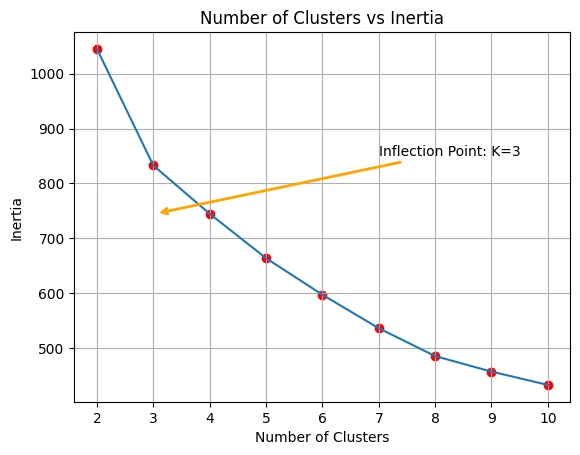

In [108]:
#plt.figure(figsize=(8,5.5))
plt.plot(range(2,11), inertia)
plt.scatter(range(2,11),inertia, color='red')
plt.title('Number of Clusters vs Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
#plt.xticks(ticks=range(2,11), labels=range(2,11))
plt.grid(True)
plt.annotate('Inflection Point: K=3',
             xy=(3.05,745),
             xytext=(7,850),
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='orange', lw=2))
#plt.annotate('',
 #            xy=(5.05,600),
  #           xytext=(9,790),
   #          arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='orange', lw=2))
plt.show()

Not easy to locate an elbow point. Maybe a kind of an elbow when k=3.  
Let's check the Distortion rate.

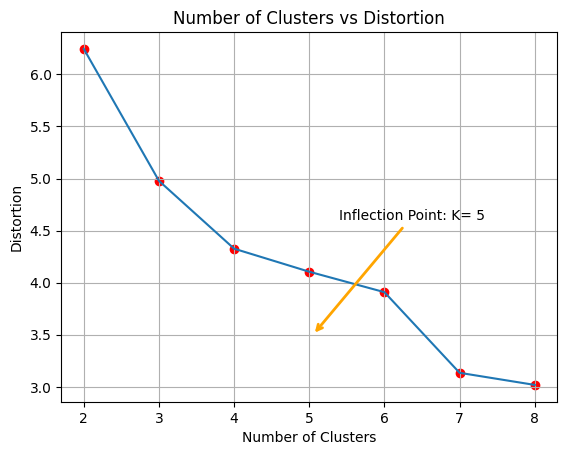

In [109]:
#plt.figure(figsize=(8,5.5))
plt.plot(range(2,9), distortion[:7])
plt.scatter(range(2,9),distortion[:7], color='red')
plt.annotate('Inflection Point: K= 5',
             xy=(5.05,3.5),
             xytext=(5.4,4.6),
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='orange', lw=2))
plt.title('Number of Clusters vs Distortion')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
#plt.xticks(ticks=range(2,11), labels=range(2,11))
plt.grid(True)
plt.show()

Again, not easy to find the elbow, however I'd say probably when k=5 (or k=4).

Based on the Inertia/Distortion analysis, I'll retrain the model with number of clusters = 3, 4, and 5.  
I'll use boxplots as comparison technique to test whether there is significant difference between the clusters, or the clusters overlap with each other and for what variable.  
Based on the boxplot analysis, I'll choose the optimum number of clusters to obtain separated (non-overlapping) clusters.

In [110]:
def cluster_boxplots(scaled_dataset, original_dataset, k=2, plot_size=(14,11), add_info=''):
    km = KMeans(init='k-means++', n_clusters=k, random_state=98)
    km.fit(scaled_dataset)
    original_dataset['cluster'] = km.labels_
    
    fig = plt.figure(figsize=plot_size)
    child_mort = fig.add_subplot(3,3,1) # or fig.add_subplot(xyz)
    exports = fig.add_subplot(3,3,2)
    health = fig.add_subplot(3,3,3)
    imports = fig.add_subplot(3,3,4)
    income = fig.add_subplot(3,3,5)
    inflation = fig.add_subplot(3,3,6)
    life_expec = fig.add_subplot(3,3,7)
    total_fer = fig.add_subplot(3,3,8)
    gdpp = fig.add_subplot(3,3,9)

    #subplot 1
    sns.boxplot(x='cluster', y='child_mort', data=original_dataset, ax=child_mort)
    child_mort.set_xlabel('')
    
    #subplot 2
    sns.boxplot(x='cluster', y='exports', data=original_dataset, ax=exports)
    exports.set_xlabel('')

    #subplot 3
    sns.boxplot(x='cluster', y='health', data=original_dataset, ax=health)
    health.set_xlabel('')

    #subplot 4
    sns.boxplot(x='cluster', y='imports', data=original_dataset, ax=imports)
    imports.set_xlabel('')
    
    #subplot 5
    sns.boxplot(x='cluster', y='income', data=original_dataset, ax=income)
    income.set_xlabel('')
    
    #subplot 6
    sns.boxplot(x='cluster', y='inflation', data=original_dataset, ax=inflation)
    inflation.set_xlabel('')

    #subplot 7
    sns.boxplot(x='cluster', y='life_expec', data=original_dataset, ax=life_expec)
    life_expec.set_xlabel('')

    #subplot 8
    sns.boxplot(x='cluster', y='total_fer', data=original_dataset, ax=total_fer)
    total_fer.set_xlabel('')
    
    #subplot 9
    sns.boxplot(x='cluster', y='gdpp', data=original_dataset, ax=gdpp)
    gdpp.set_xlabel('')
    
    fig.suptitle('Clusters by Country Features - No of Cluster: {}{}'.format(k,add_info), fontsize=14)
    plt.tight_layout(pad=2)
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


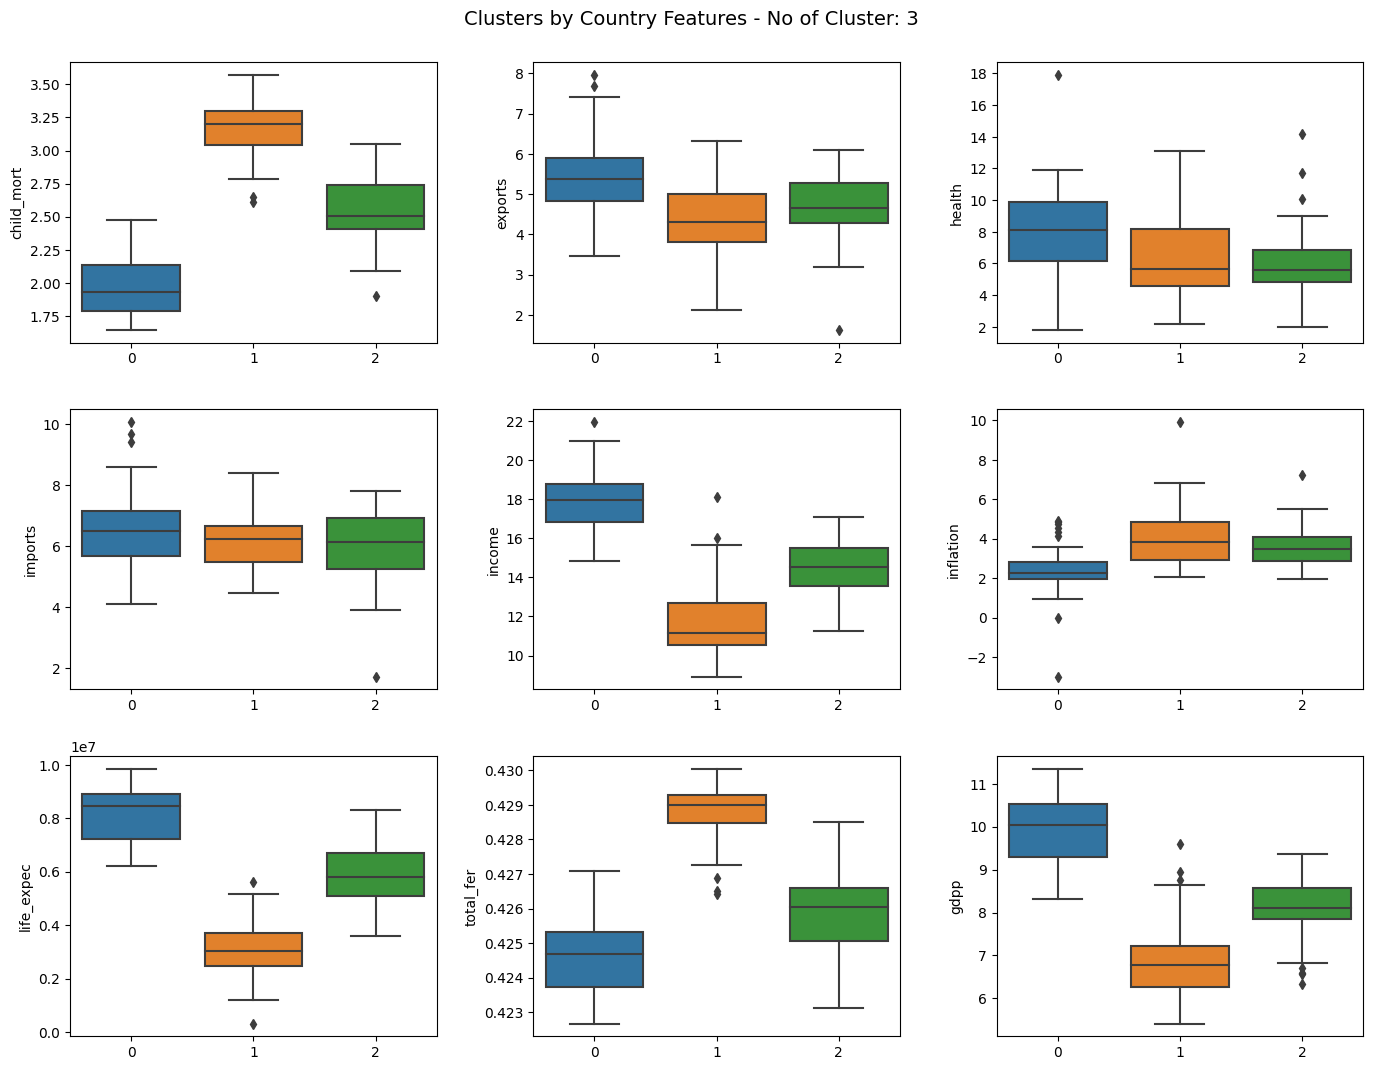

In [111]:
cluster_boxplots(scaled_ds,bc_data, k=3)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


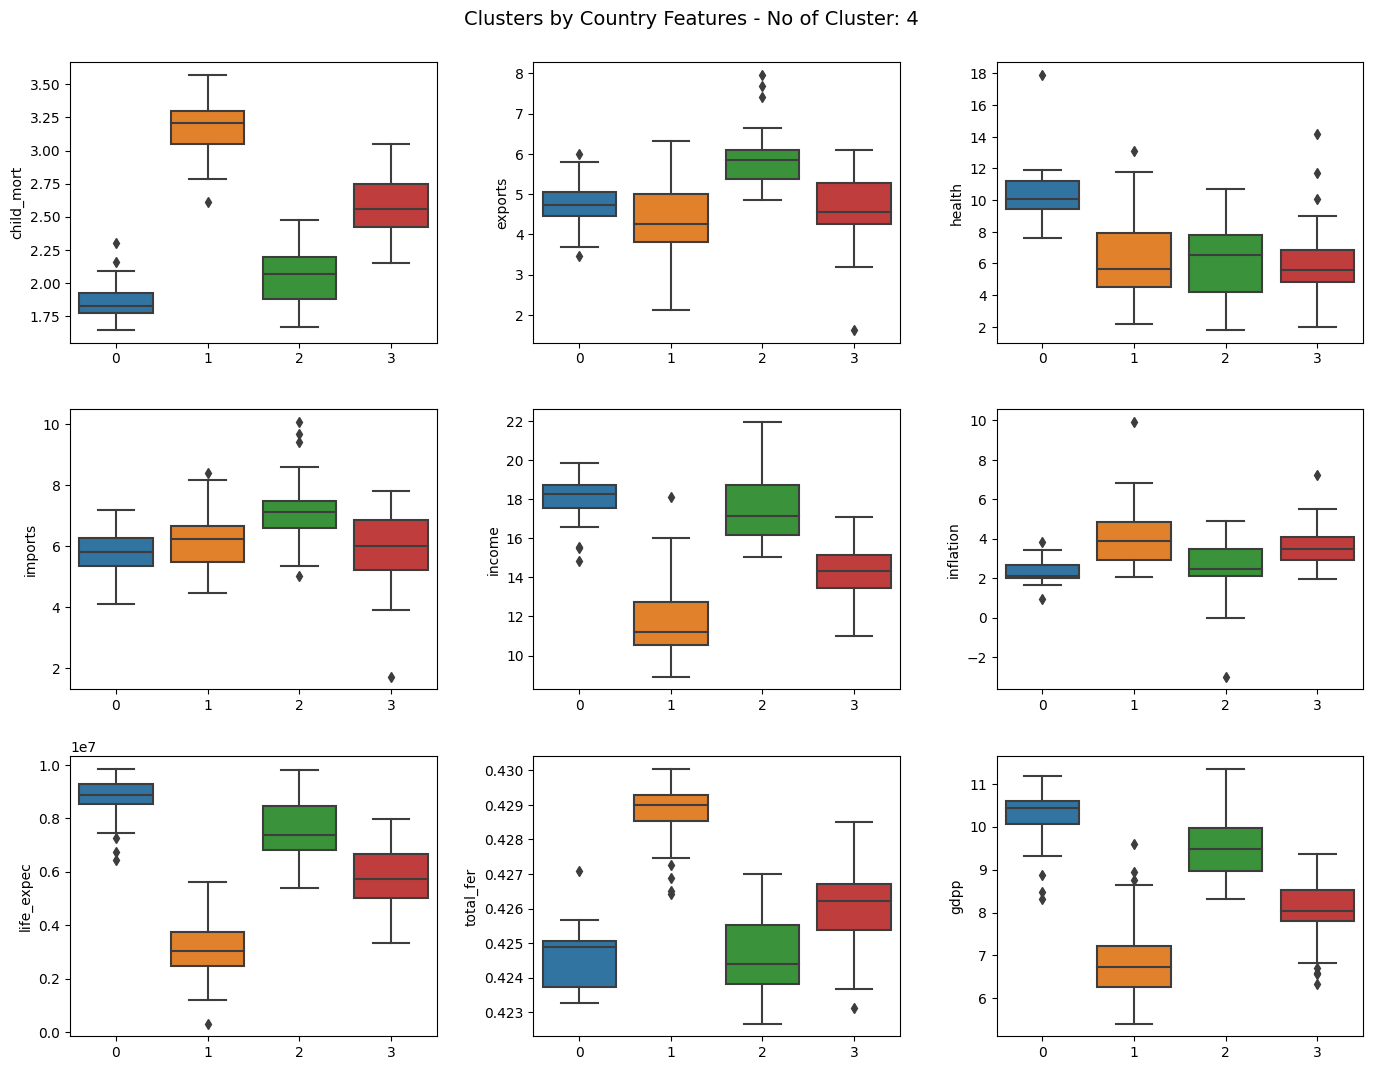

In [112]:
cluster_boxplots(scaled_ds, bc_data, k=4)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


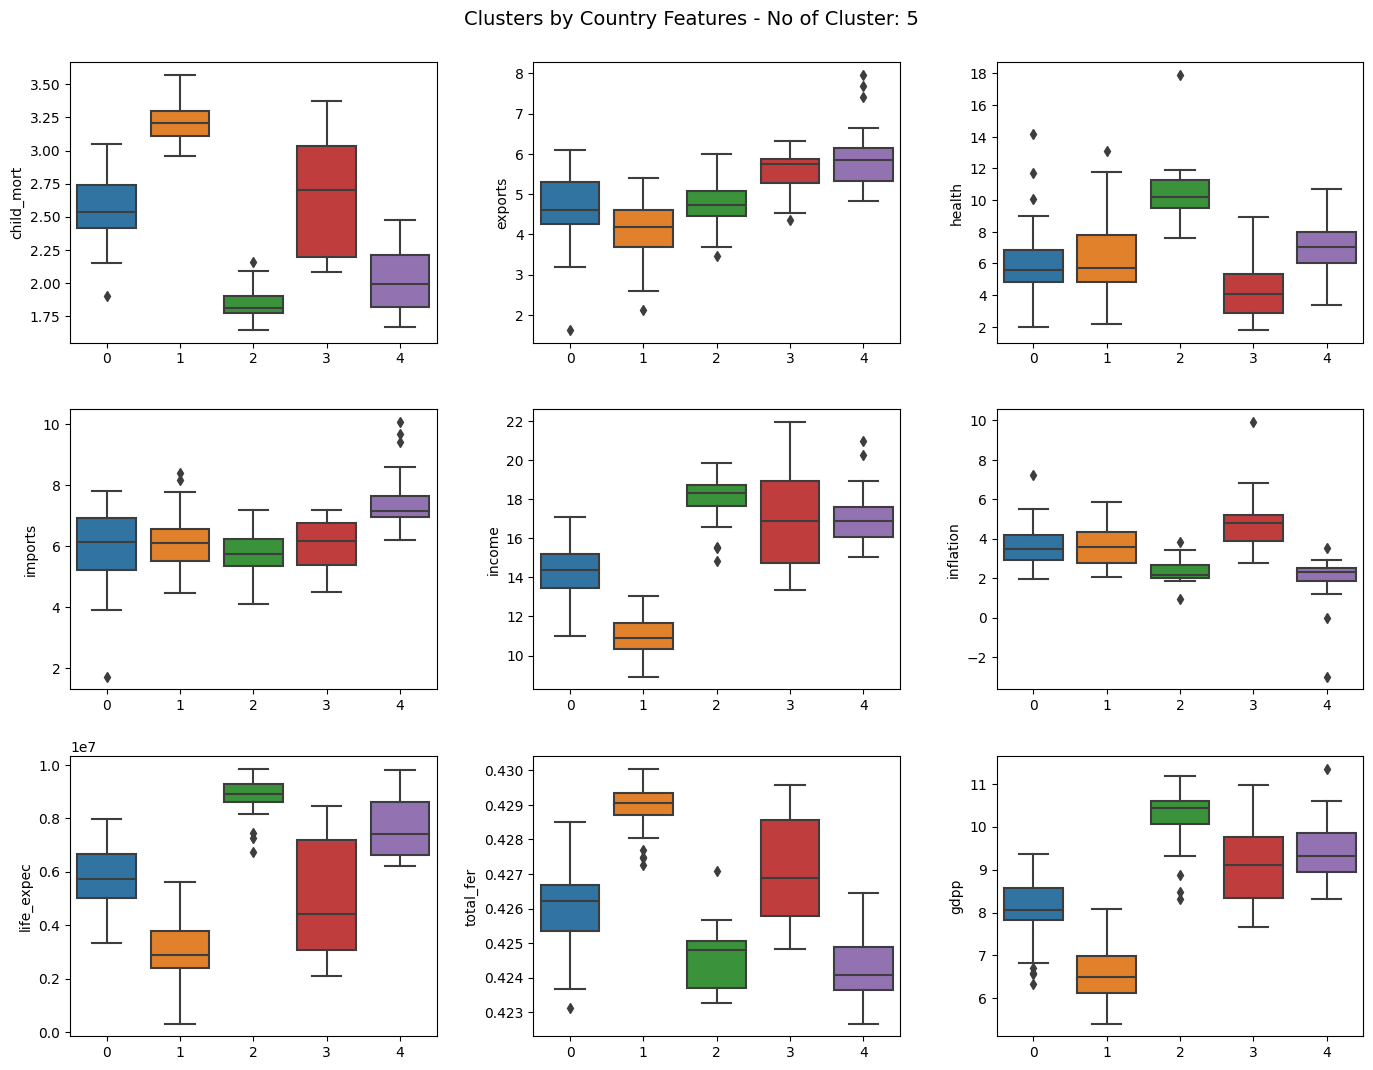

In [113]:
cluster_boxplots(scaled_ds, bc_data, k=5)

There's clear overlapping between the clusters in following variables:
* imports
* health
* exports
* inflation  
which means the above variables are not very significant features for this clustering exercise.

When the number of cluster is 3, we can see (more or less) distinct clusters for all other features (the significant features):
* child_mort
* income
* life_expec
* total_fe
* gdpp

Increase the number of clusters, doesn't provide any better insights for our data (making useless increase the number of clusters):
* When the number of clusters is 4, clusters 0 and 2 significantly overlap.  
* When the number of clusters is 5, clusters 0, 2 and 4 significantly overlap.

3 is the greatest number of distinct meaningful clusters we can achieve with K-means, using all data features. 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Pairplot - Number of K-Means clusters (using all data features): 3


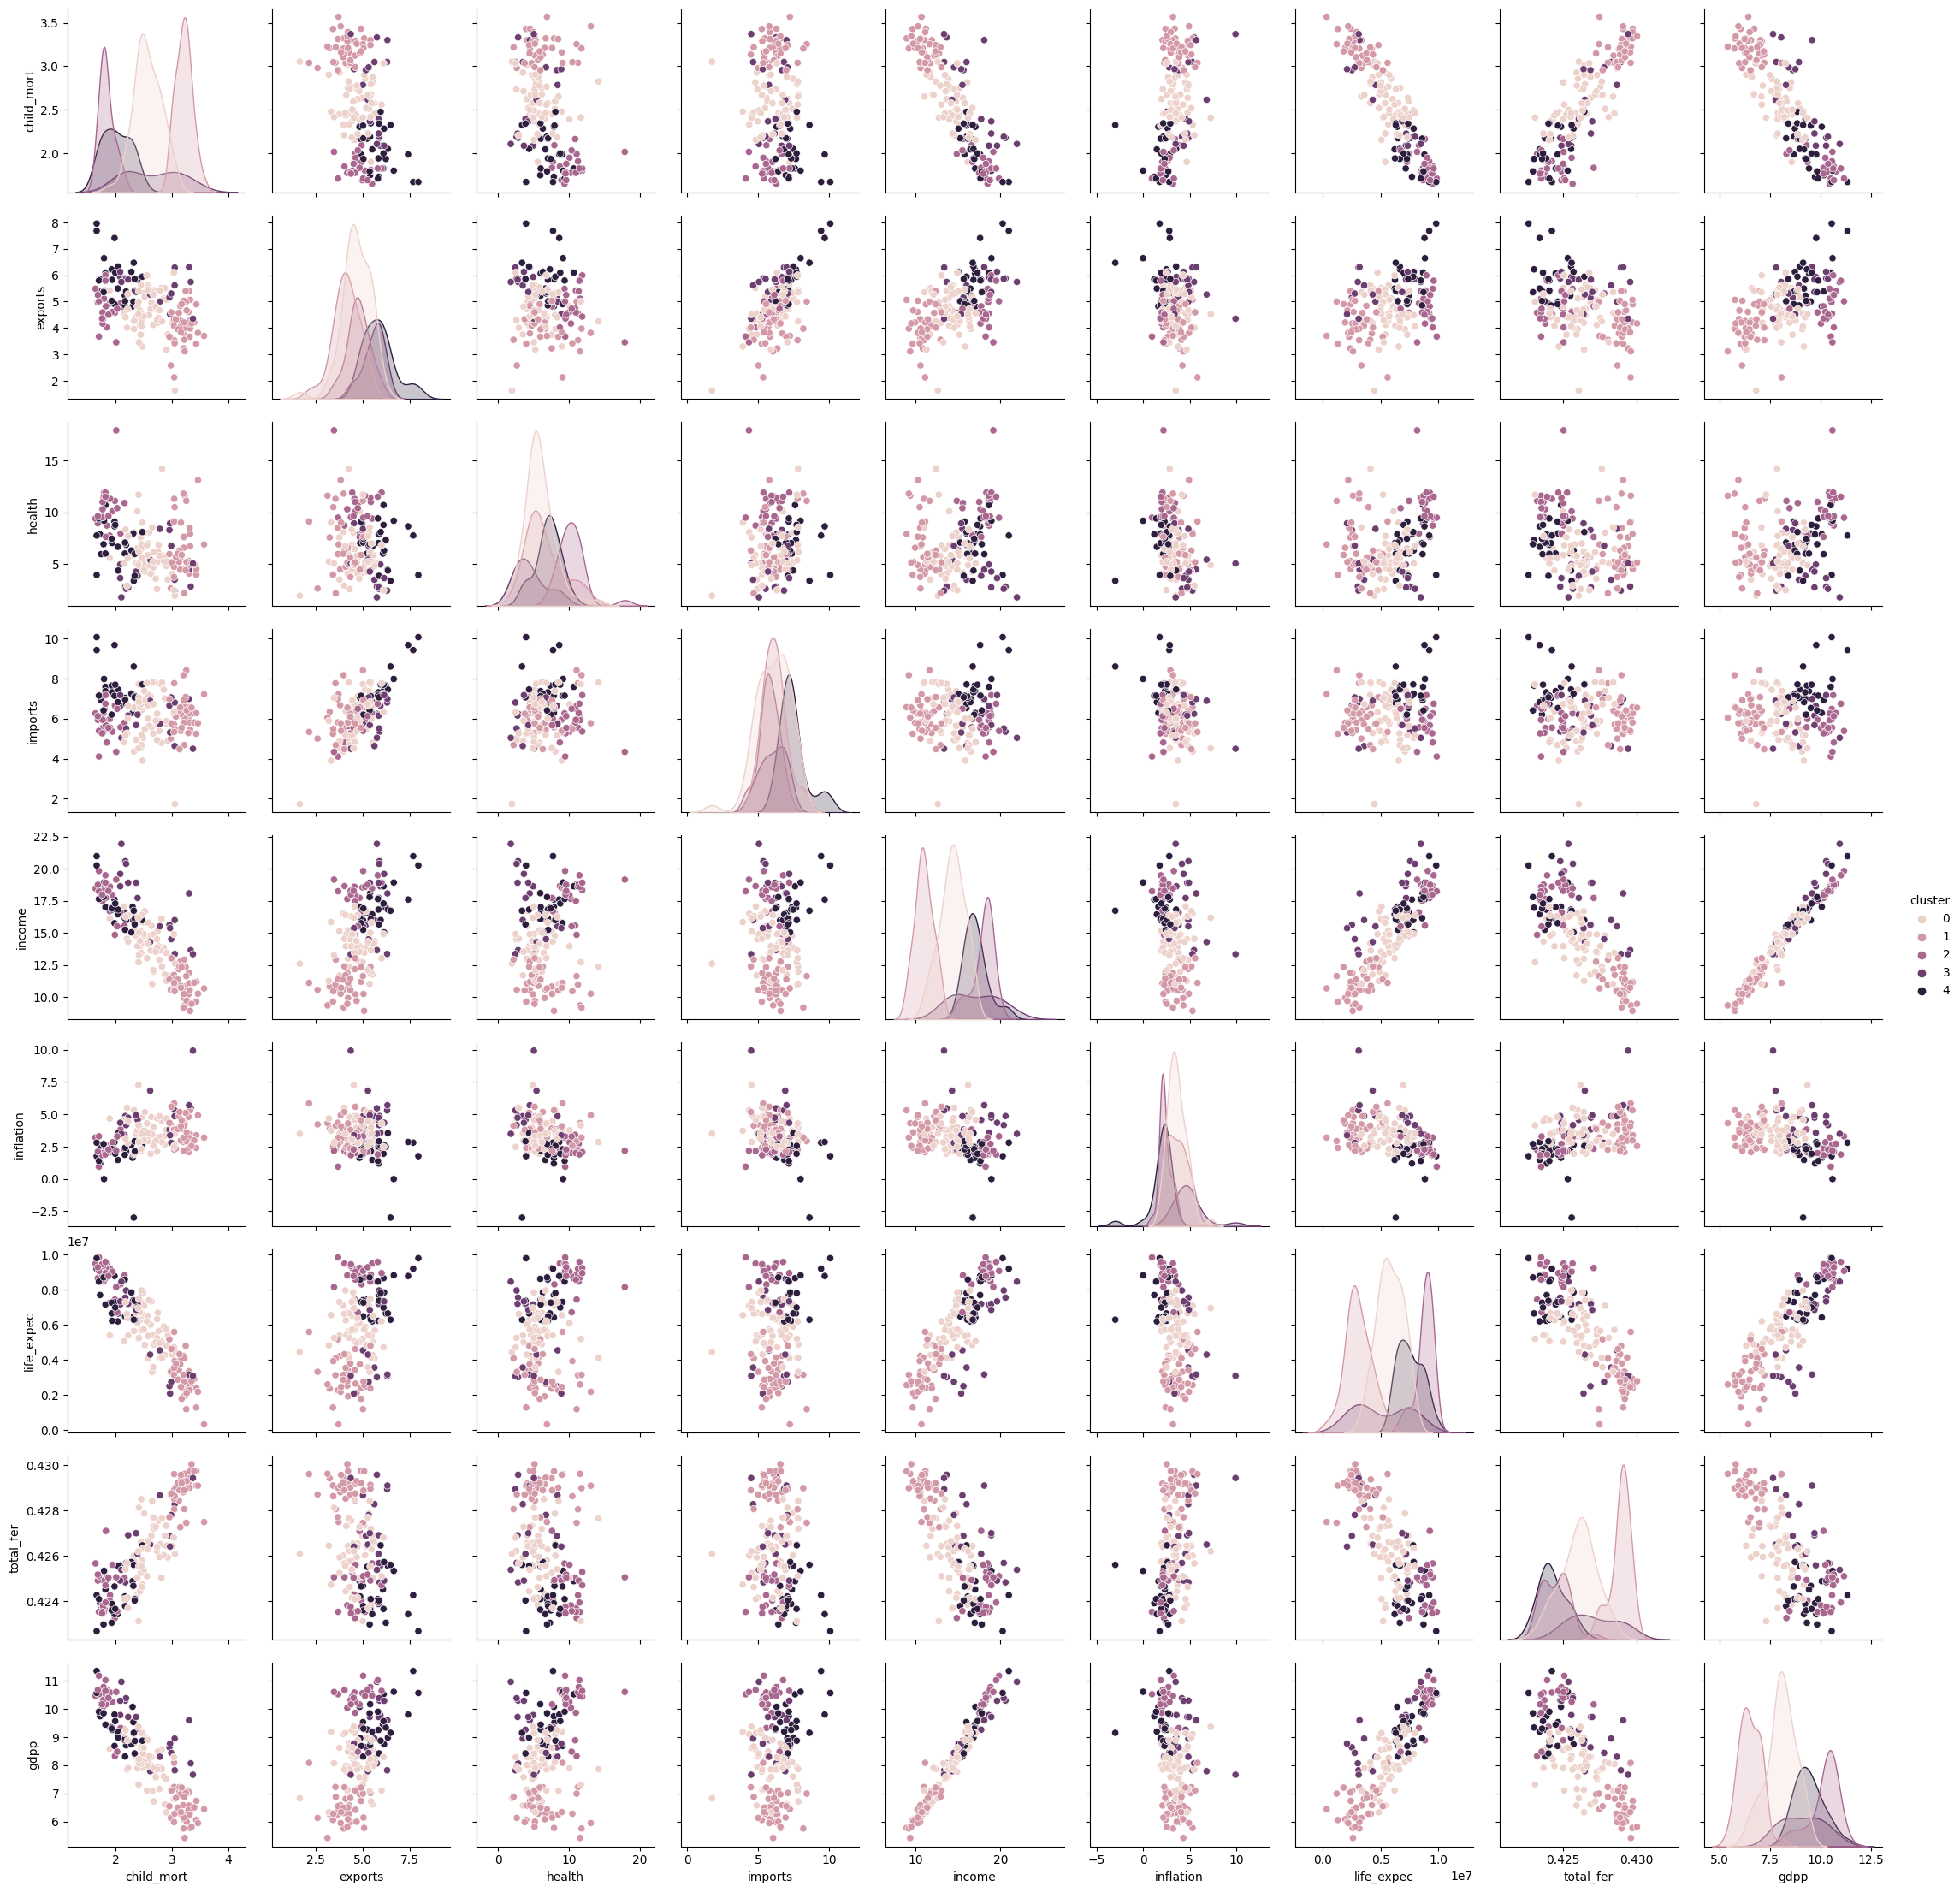

In [ ]:
km = KMeans(init='k-means++', n_clusters=3, random_state=98)
km.fit(scaled_ds)
df['cluster'] = km.labels_
print('Pairplot - Number of K-Means clusters (using all data features): 3')
sns.pairplot(bc_data, hue='cluster')
plt.show()

#### Principal Component Analysis

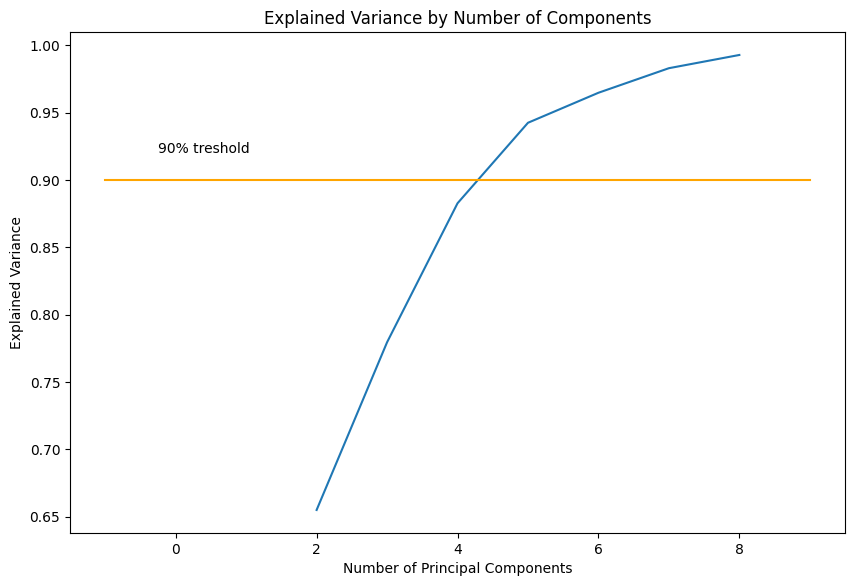

In [115]:
expl_var = {'N_components':[], 'Explained Variance':[]}

for p in range(2,9):
    pca = PCA(n_components=p)
    pca_data = pca.fit_transform(scaled_ds)
    expl_var['N_components'].append(p)
    expl_var['Explained Variance'].append(pca.explained_variance_ratio_.sum())
    

expl_var = pd.DataFrame(expl_var)
barchart = expl_var.plot(x='N_components', y='Explained Variance', kind='line',figsize=(10,6.5), legend=False)
for i in barchart.patches:
    barchart.annotate(round(i.get_height(),3), # get the frequency of the variable categories
                      xy = (i.get_x() + i.get_width()/2, i.get_height()*1.005), # set the coordinates for each label
                      ha='center', # set the horizontal alignment
                      va='top', # set the vertical alignment
                      xytext=(0,10), # default
                      textcoords='offset points', # default
                      fontsize=10) # set the font size
plt.plot(range(-1,10), np.full((11,), 0.9), color='orange')
plt.text(-0.25, 0.92, '90% treshold')
plt.title('Explained Variance by Number of Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.xticks(rotation=0)
plt.grid(False)
plt.show()

If we reduce the dimensionality from 9 features to 4 components, we still can maintain more than 90% of the original variance. I choose 4 as number of new components, and retrain the k-means algorithm on the dimension-reduced dataset  

In [116]:
pca = PCA(n_components=4)
pca_data = pca.fit_transform(scaled_ds)

inertia = []
distortion = []
silhouette = []

for k in range(2,11):
    km = KMeans(init='k-means++', n_clusters=k, random_state=98)
    km.fit(pca_data)
    inertia.append(km.inertia_)
    distortion.append(distortion_function(k=k, dataset=pca_data))
    silhouette.append(silhouette_score(pca_data, km.labels_))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

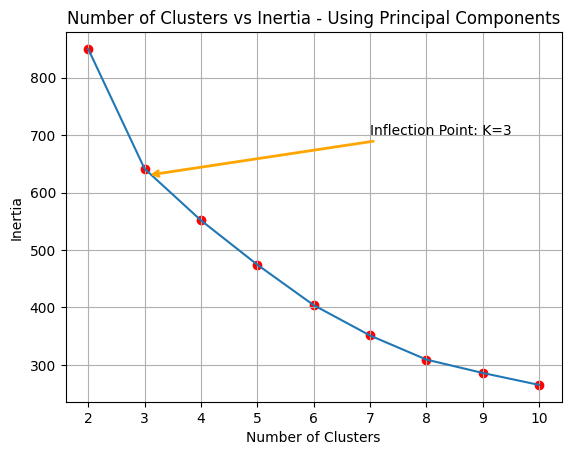

In [117]:
plt.plot(range(2,11), inertia)
plt.scatter(range(2,11),inertia, color='red')
plt.title('Number of Clusters vs Inertia - Using Principal Components')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.annotate('Inflection Point: K=3',
             xy=(3.05,630),
             xytext=(7,700),
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='orange', lw=2))
plt.show()

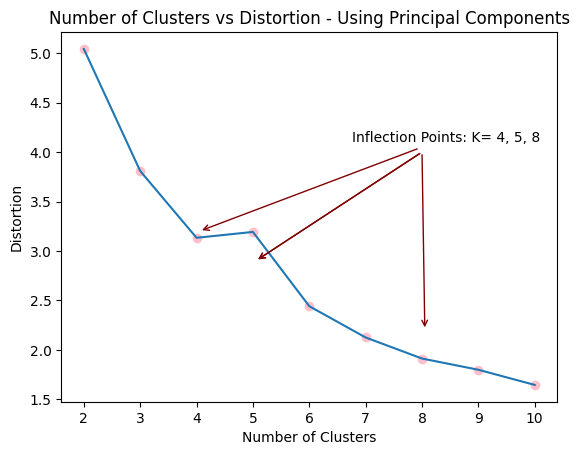

In [118]:
plt.plot(range(2,11), distortion)
plt.scatter(range(2,11),distortion, color='pink')
plt.annotate('Inflection Points: K= 4, 5, 8',
              xy=(4.05,3.2),
              xytext=(6.75,4.1),
              arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='maroon'))
plt.annotate('',
             xy=(5.05,2.9),
             xytext=(8,4),
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='maroon'))
plt.annotate('',
             xy=(5.05,2.9),
             xytext=(8,4),
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='maroon'))
plt.annotate('',
             xy=(8.05,2.2),
             xytext=(8,4),
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='maroon'))
plt.title('Number of Clusters vs Distortion - Using Principal Components')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')

plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


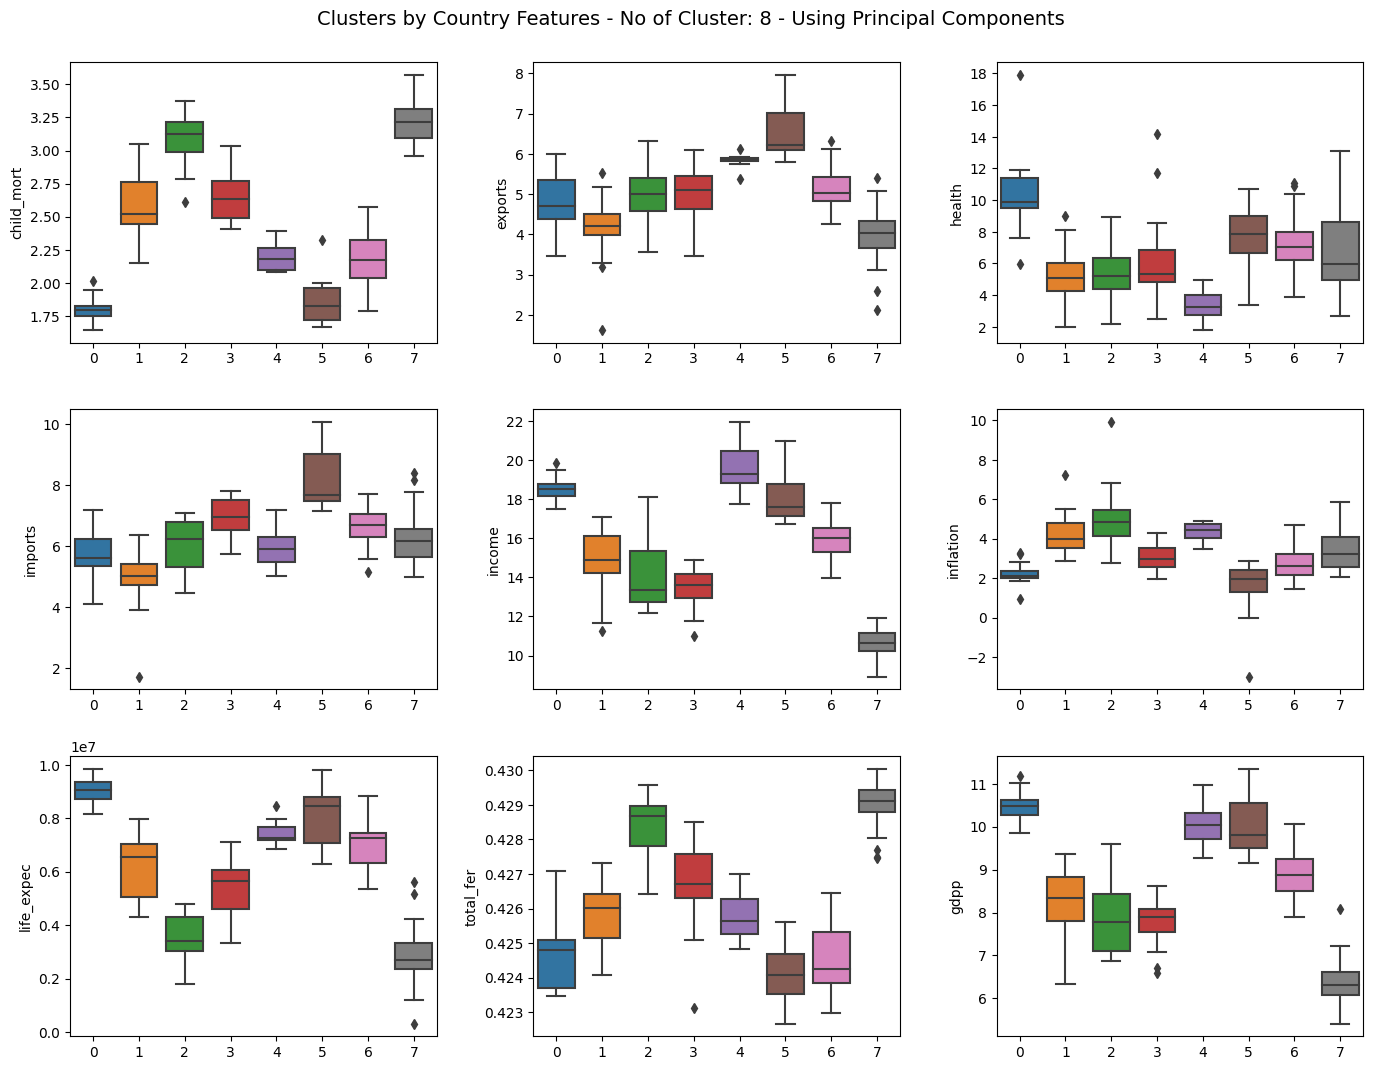

In [119]:
cluster_boxplots(pca_data, bc_data, k=8, add_info=' - Using Principal Components')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


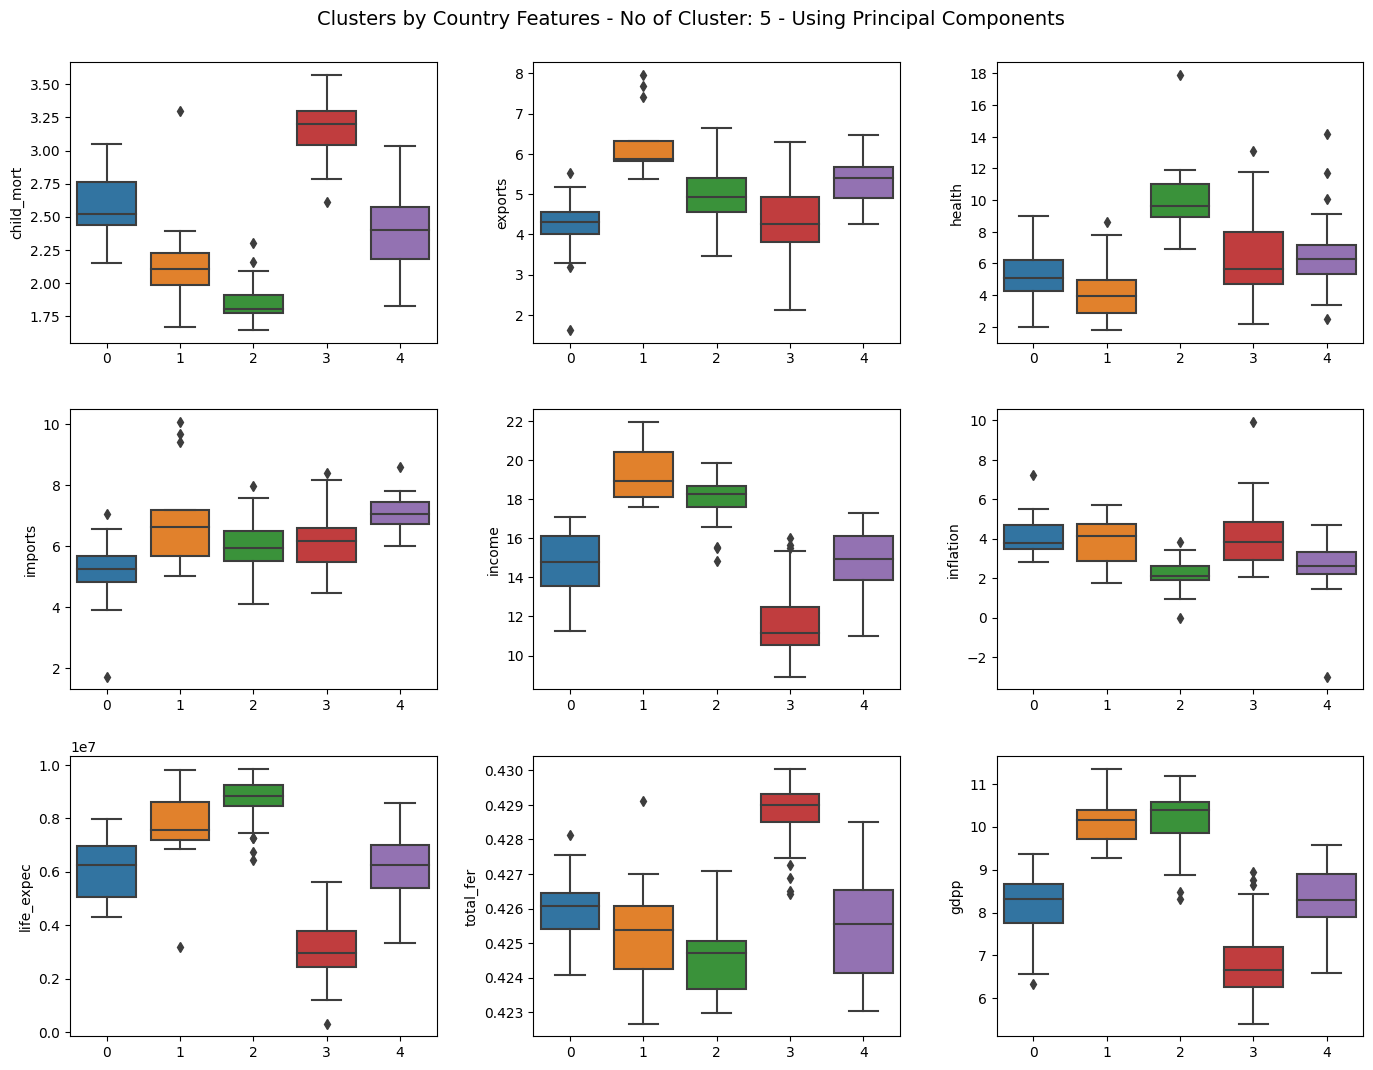

In [120]:
cluster_boxplots(pca_data, bc_data, k=5, add_info=' - Using Principal Components')

clusters 0-4 and 1-3 overlap.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


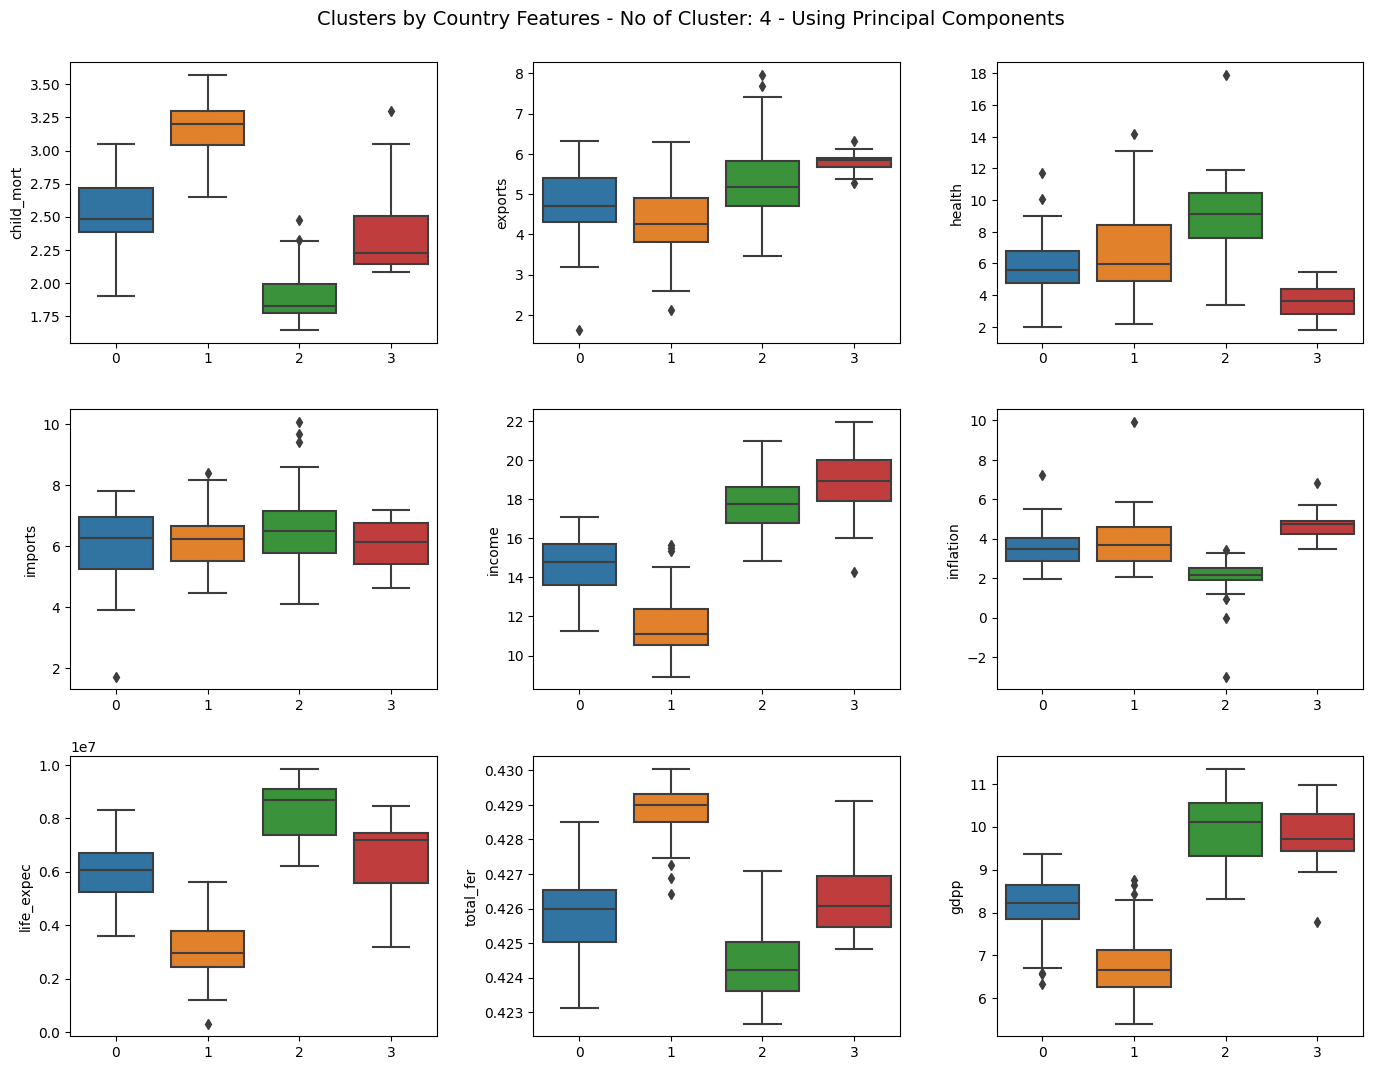

In [121]:
cluster_boxplots(pca_data, bc_data, k=4, add_info=' - Using Principal Components')

clusters 1-3 overlap.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


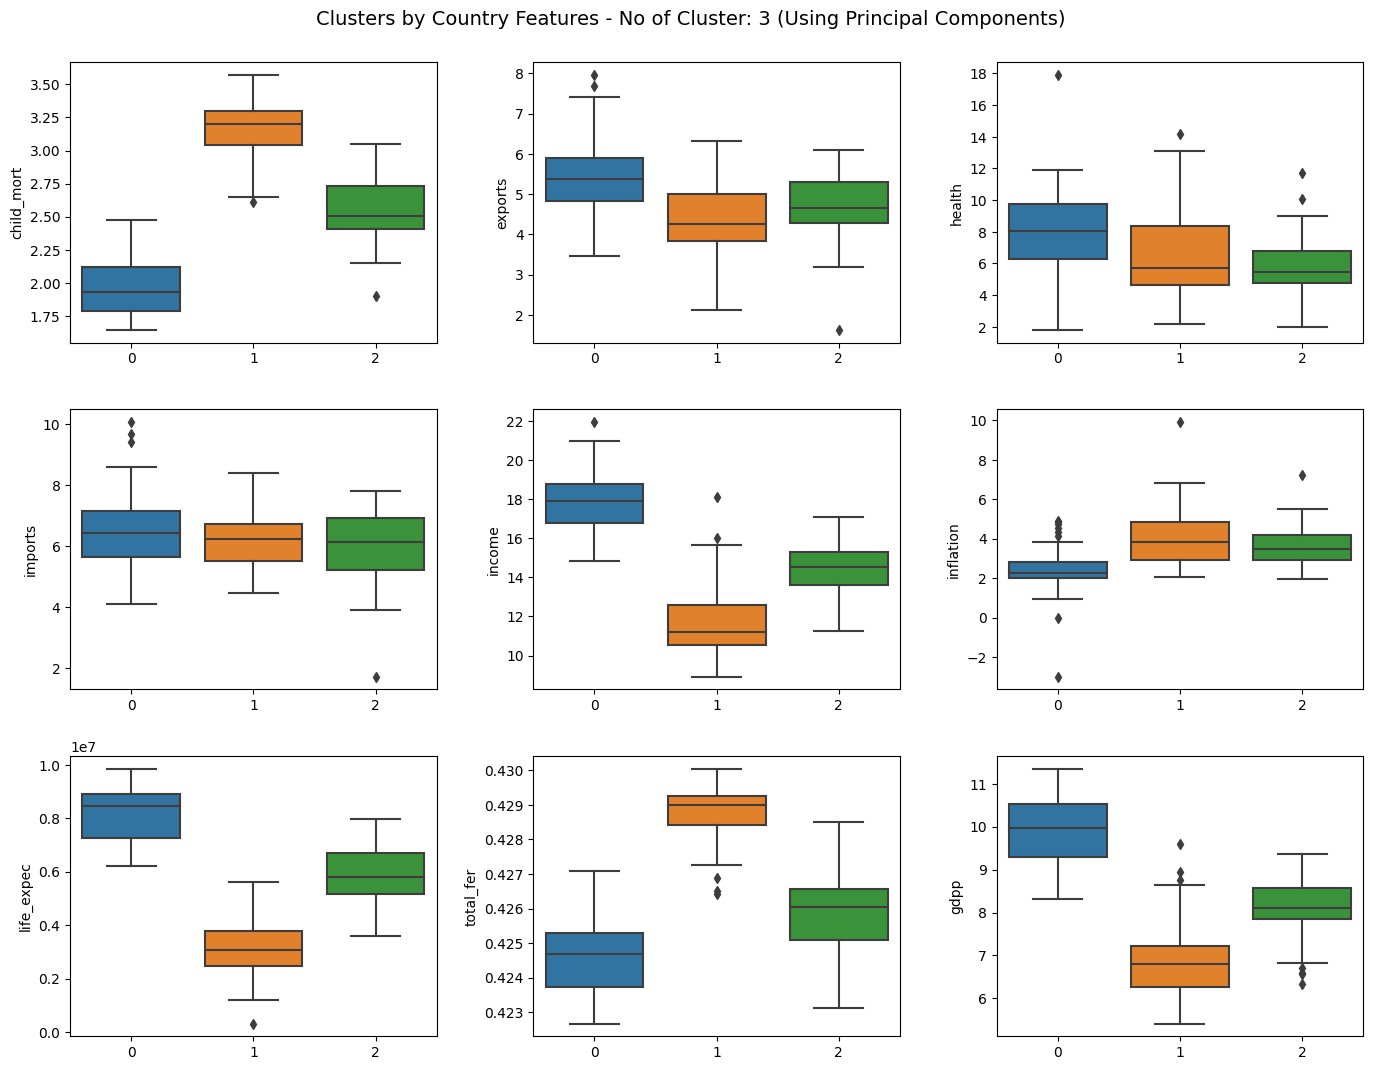

In [122]:
cluster_boxplots(pca_data, bc_data, k=3, add_info=' (Using Principal Components)')

It seems that even when using Principal Component Analysis technique, the best greatest number of clusters to avoid cluster's overlapping is 3. I'll check the Silhouette Score of both models (original number of features vs PCA) to test which one performed better.

In [123]:
silhouette={'Dataset':[], 'Silhouette_Score':[]}
km = KMeans(init='k-means++', n_clusters=3, random_state=98)
km.fit(scaled_ds)
silhouette['Dataset'].append('Original number of features')
silhouette['Silhouette_Score'].append(silhouette_score(scaled_ds, km.labels_))
km.fit(pca_data)
silhouette['Dataset'].append('PCA')
silhouette['Silhouette_Score'].append(silhouette_score(pca_data, km.labels_))
pd.DataFrame(silhouette['Silhouette_Score'], index=silhouette['Dataset'], columns=['Silhouette_Score'])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette_Score
Original number of features          0.270400
PCA                                  0.324156

Reducing the dataset dimensionality using PCA, whilst doesn't produce better results when increasing the number of clusters, achieved a greatest Silhouette Score, when the number of clusters is 3, which means the clusters are better formed.

#### Feature Selection

I'll select the features where the distinction between clusters is more evident, therefore I'll delete the following features where the clusters significantly overlap:
* health
* imports
* inflation
* exports

In [125]:
slct_ds = bc_data.drop(['health', 'imports', 'inflation', 'exports', 'cluster'], axis=1)
slct_ds_scld = StandardScaler().fit_transform(slct_ds)

In [126]:
inertia = []
distortion = []
silhouette = []

for k in range(2,11):
    km = KMeans(init='k-means++', n_clusters=k, random_state=98)
    km.fit(slct_ds_scld)
    inertia.append(km.inertia_)
    distortion.append(distortion_function(k=k, dataset=slct_ds_scld))
    silhouette.append(silhouette_score(slct_ds_scld, km.labels_))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

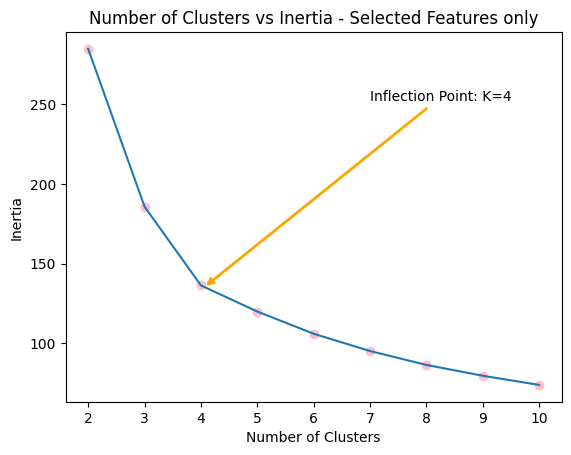

In [129]:
plt.plot(range(2,11), inertia)
plt.scatter(range(2,11),inertia, color='pink')
plt.title('Number of Clusters vs Inertia - Selected Features only')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.annotate('Inflection Point: K=4',
              xy=(4.05,135),
              xytext=(7,252),
              arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='orange', lw=2))
plt.show()

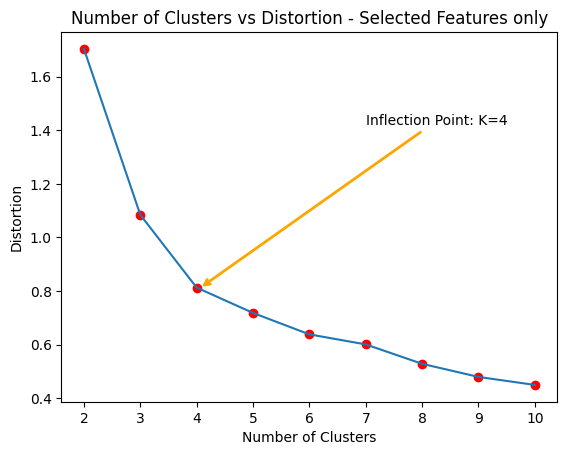

In [130]:
plt.plot(range(2,11), distortion)
plt.scatter(range(2,11),distortion, color='red')
plt.title('Number of Clusters vs Distortion - Selected Features only')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.annotate('Inflection Point: K=4',
              xy=(4.05,0.81),
              xytext=(7,1.42),
              arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='orange', lw=2))

plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


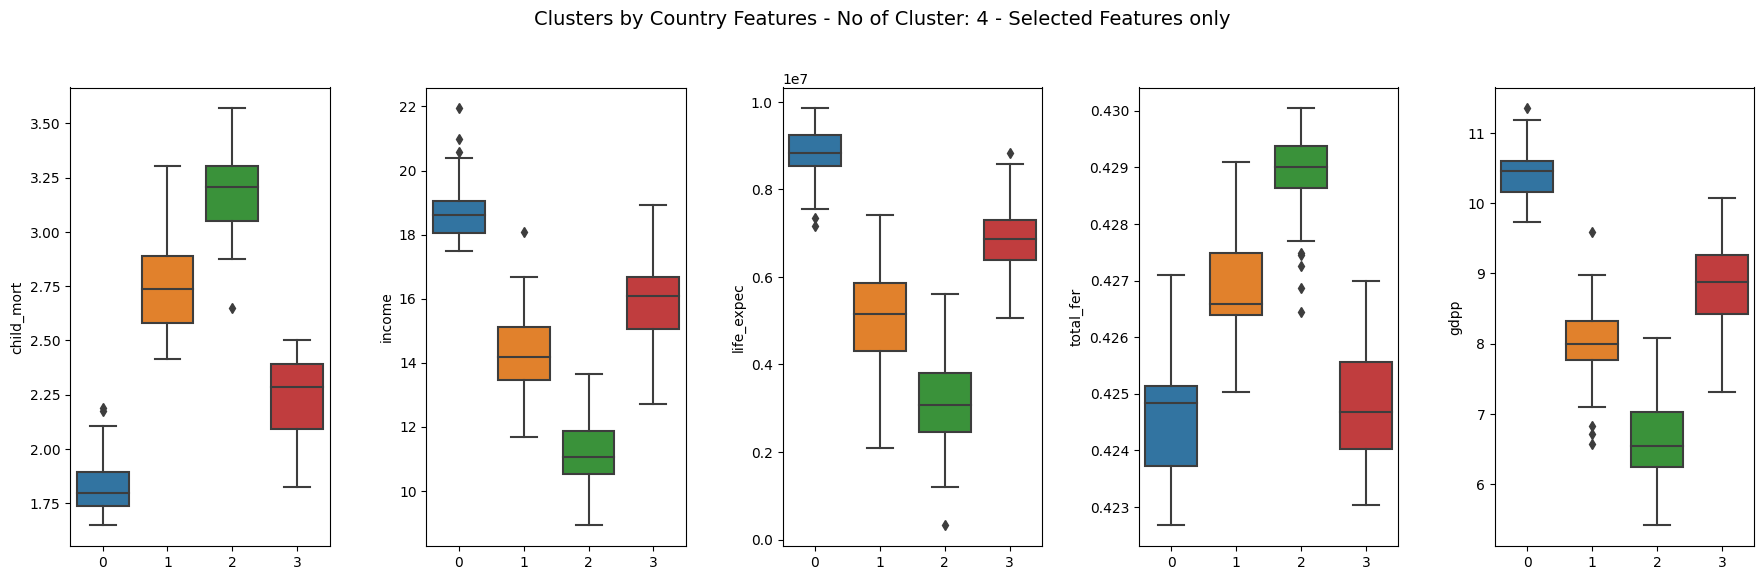

In [131]:
km = KMeans(init='k-means++', n_clusters=4, random_state=98)
km.fit(slct_ds_scld)
slct_ds['cluster'] = km.labels_
    
fig = plt.figure(figsize=(18,6))
child_mort = fig.add_subplot(1,5,1)
income = fig.add_subplot(1,5,2)
life_expec = fig.add_subplot(1,5,3)
total_fer = fig.add_subplot(1,5,4)
gdpp = fig.add_subplot(1,5,5)

sns.boxplot(x='cluster', y='child_mort', data=slct_ds, ax=child_mort)
child_mort.set_xlabel('')

sns.boxplot(x='cluster', y='income', data=slct_ds, ax=income)
income.set_xlabel('')
    
sns.boxplot(x='cluster', y='life_expec', data=slct_ds, ax=life_expec)
life_expec.set_xlabel('')

sns.boxplot(x='cluster', y='total_fer', data=slct_ds, ax=total_fer)
total_fer.set_xlabel('')

sns.boxplot(x='cluster', y='gdpp', data=slct_ds, ax=gdpp)
gdpp.set_xlabel('')
    
fig.suptitle('Clusters by Country Features - No of Cluster: 4 - Selected Features only', fontsize=14)
plt.tight_layout(pad=2)
plt.show()

Pairplot - Number of Cluster: 4 (Selected Features only)


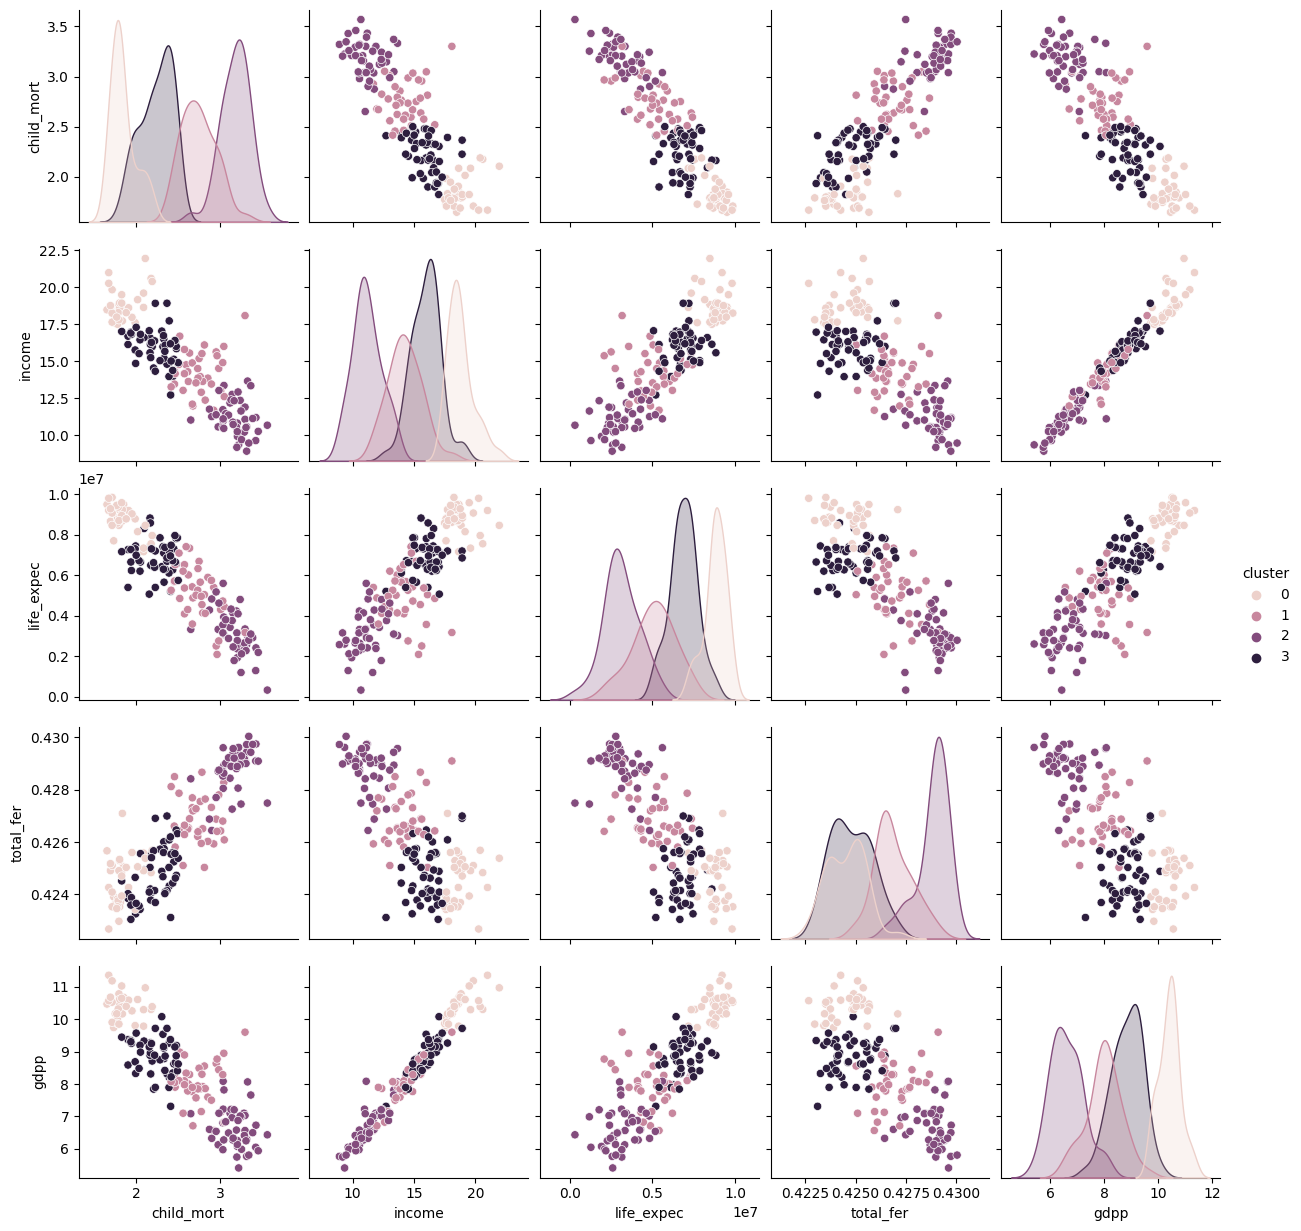

In [132]:
print('Pairplot - Number of Cluster: 4 (Selected Features only)')
sns.pairplot(slct_ds, hue='cluster')
plt.show()

### Hierarchical Agglomerative Clustering <a name=hac></a>

#### 4.2.1. Hierarchical Agglomerative Clustering with Euclidean Distance

##### Linkage: ward - minimizing the intra-cluster inertia

In [138]:
# I define a function to plot the dendrogram from the Hierarchical Agglomerative Clustering algorithm\
## using the dendrogram method available in scipy.

def plot_dendrogram(model, p=50, dend_title='Hierarchical Clustering Dendrogram', size=(16,6), x_line=0, y_line=0, x_text=0,\
                    y_text=0, text=''):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    plt.figure(figsize=(size))
    den = hierarchy.dendrogram(linkage_matrix, orientation='top', p=p, truncate_mode='lastp', show_leaf_counts=True)
    plt.plot(x_line,y_line, color='orange')
    plt.text(x_text, y_text, text)
    plt.title(dend_title)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.ylabel('Distance')
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


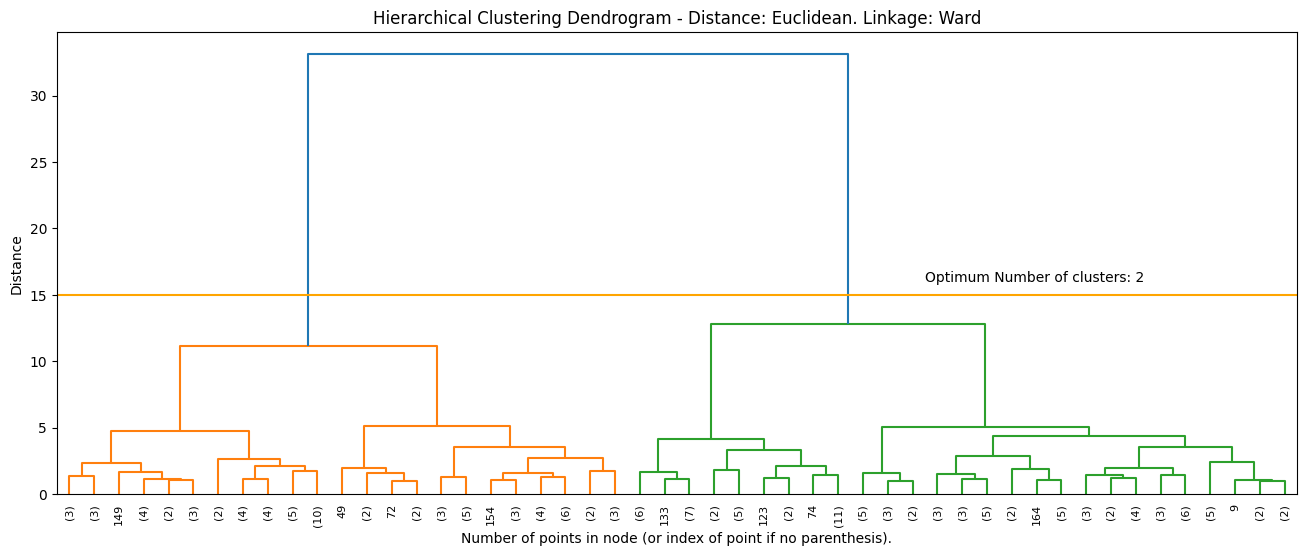

In [139]:
hac = AgglomerativeClustering(n_clusters=None, distance_threshold=0, affinity='euclidean', linkage='ward')
hac.fit(slct_ds_scld)
plot_dendrogram(hac,dend_title='Hierarchical Clustering Dendrogram - Distance: Euclidean. Linkage: Ward', x_line=range(600),
                y_line=np.full((600,), 15), x_text=350, y_text=16, text='Optimum Number of clusters: 2')

If we analyze the dendrogram, we can see that there is a huge jump in distance when going from 4 to 2 clusters. We can conclude that the optimum number of clusters with this parameters (distance: Euclidean; linkage: Ward) is 2.  
Since with K-means we were able to cluster our data in 4 distinct clusters, K-means algorithm performs better than Hierarchical Agglomerative Clustering in segmenting our dataset.  
I'll try again changing the parameters of the Hierarchical Agglomerative Clustering algorithm.

##### Linkage: single - insuring clear boundaries between clusters

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


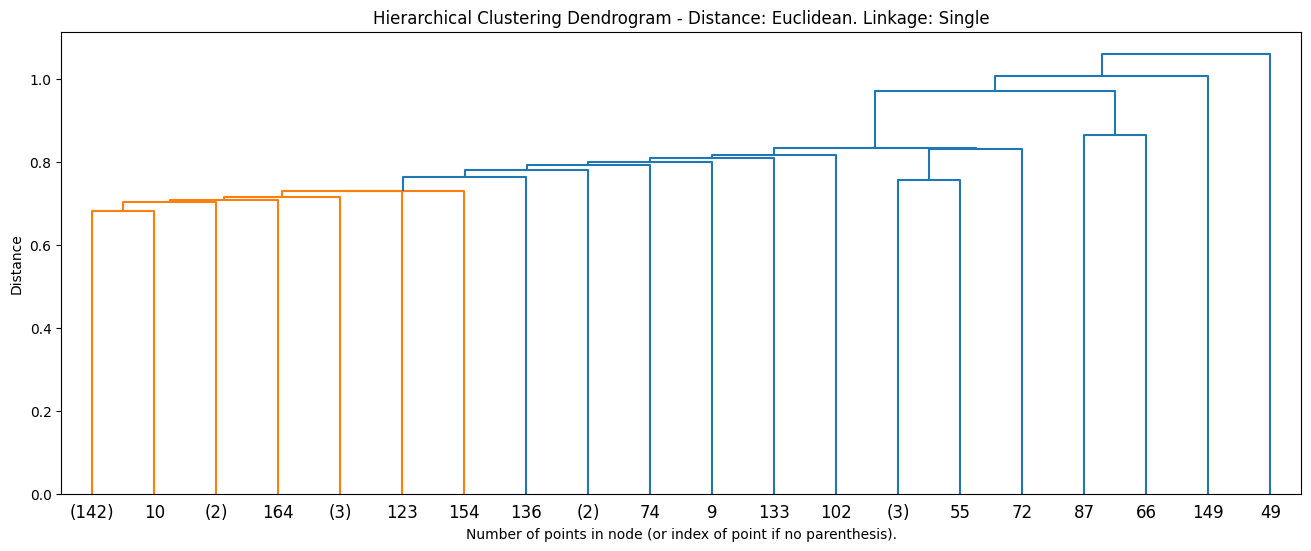

In [140]:
hac = AgglomerativeClustering(n_clusters=None, distance_threshold=0, affinity='euclidean', linkage='single')
hac.fit(slct_ds_scld)
plot_dendrogram(hac, dend_title='Hierarchical Clustering Dendrogram - Distance: Euclidean. Linkage: Single', p=20)

Single linkage doesn't perform well at all.

##### Linkage: complete - reducing the impact of outliers

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


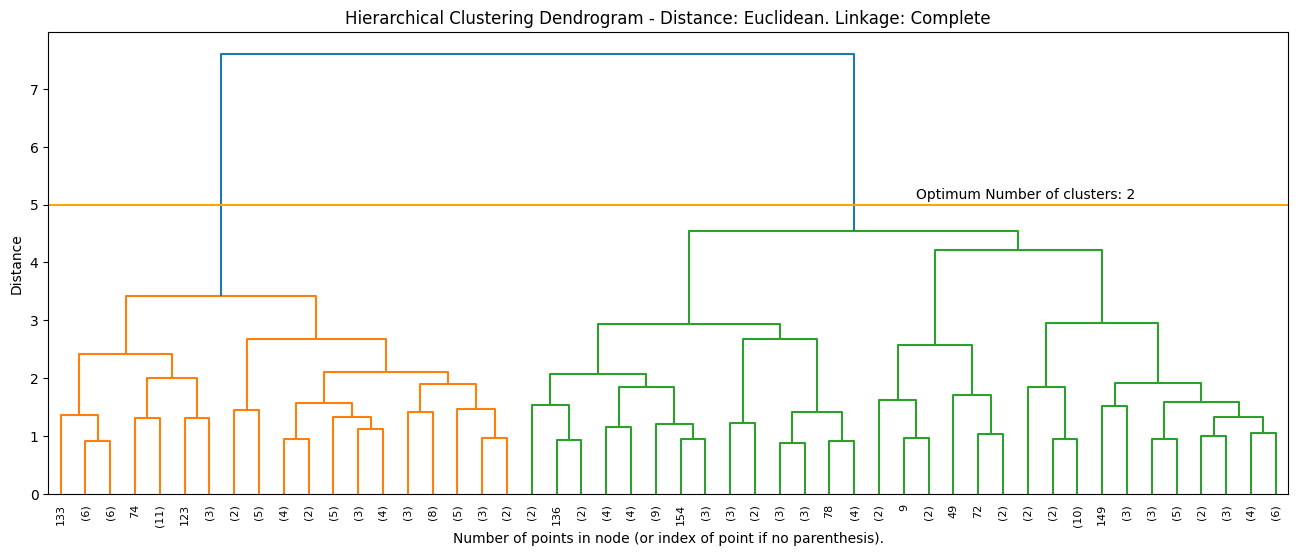

In [141]:
hac = AgglomerativeClustering(n_clusters=None, distance_threshold=0, affinity='euclidean', linkage='complete')
hac.fit(slct_ds_scld)
plot_dendrogram(hac,dend_title='Hierarchical Clustering Dendrogram - Distance: Euclidean. Linkage: Complete', x_line=range(600),
                y_line=np.full((600,), 5), x_text=350, y_text=5.1, text='Optimum Number of clusters: 2')

With Complete linkage the optimum number of clusters is, again, 2.

##### Linkage: average

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


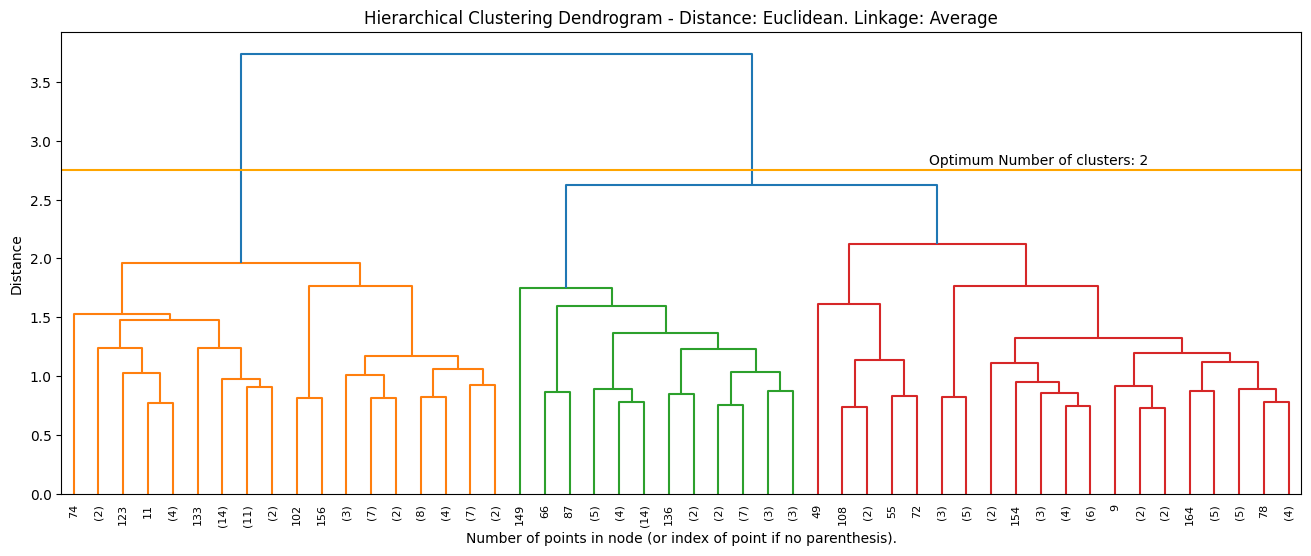

In [142]:
hac = AgglomerativeClustering(n_clusters=None, distance_threshold=0, affinity='euclidean', linkage='average')
hac.fit(slct_ds_scld)
plot_dendrogram(hac,dend_title='Hierarchical Clustering Dendrogram - Distance: Euclidean. Linkage: Average', p=50,\
                x_line=range(600), y_line=np.full((600,), 2.75), x_text=350, y_text=2.8, text='Optimum Number of clusters: 2')

With Average linkage the optimum number of clusters is, again, 2.

Hierarchical Agglomerative Clustering with Euclidean Distance doesn't perform better than K-Means, in terms of understanding/segmenting our data.  
I'll try with the Manhattan Distance.

#### Hierarchical Agglomerative Clustering with manhattan Distance

##### Linkage: single - insuring clear boundaries between clusters

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


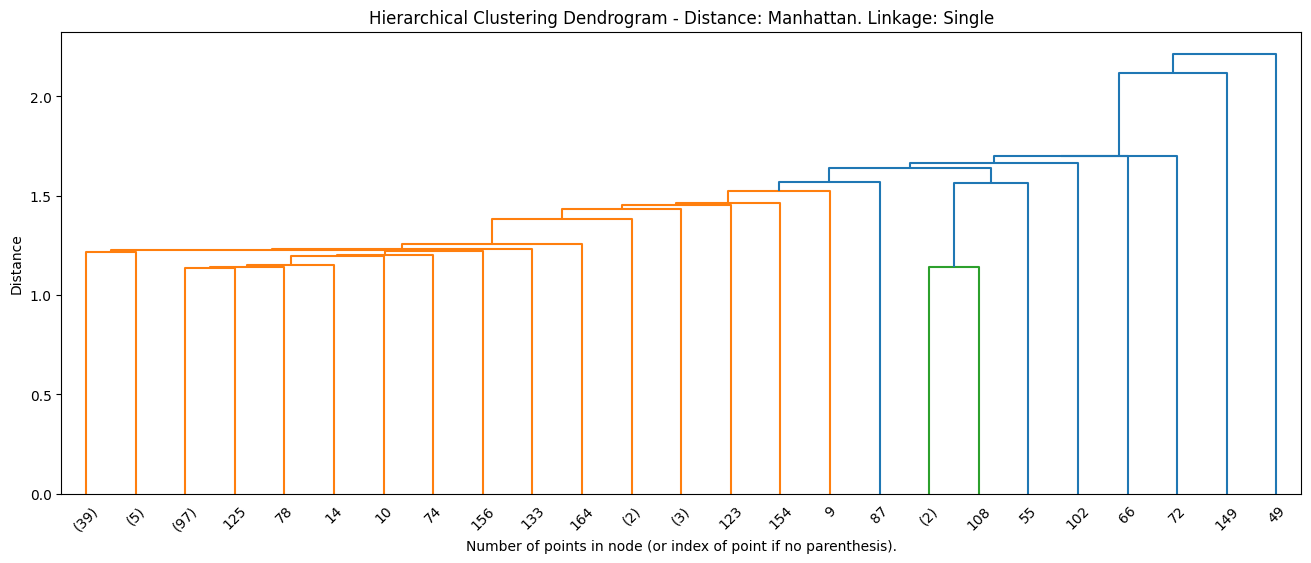

In [143]:
hac = AgglomerativeClustering(n_clusters=None, distance_threshold=0, affinity='manhattan', linkage='single')
hac.fit(slct_ds_scld)
plot_dendrogram(hac,dend_title='Hierarchical Clustering Dendrogram - Distance: Manhattan. Linkage: Single', p=25)

##### Linkage: complete - reducing the impact of outliers

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


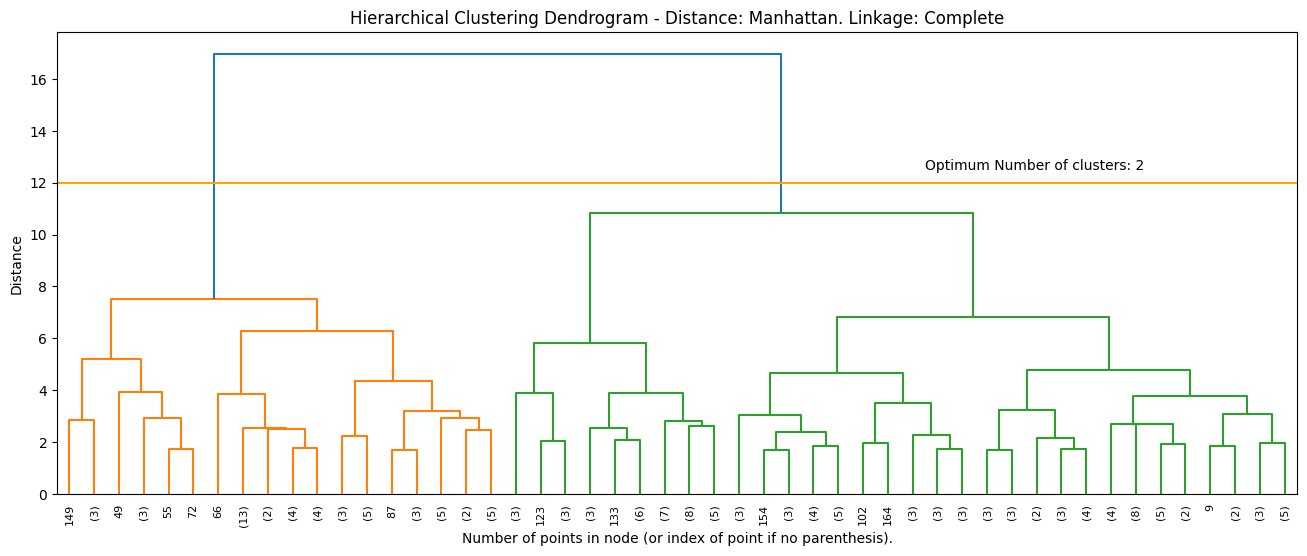

In [144]:
hac = AgglomerativeClustering(n_clusters=None, distance_threshold=0, affinity='manhattan', linkage='complete')
hac.fit(slct_ds_scld)
plot_dendrogram(hac,dend_title='Hierarchical Clustering Dendrogram - Distance: Manhattan. Linkage: Complete',\
                x_line=range(600), y_line=np.full((600,), 12), x_text=350, y_text=12.5, text='Optimum Number of clusters: 2')

##### Linkage: average - reducing the average distance between clusters

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


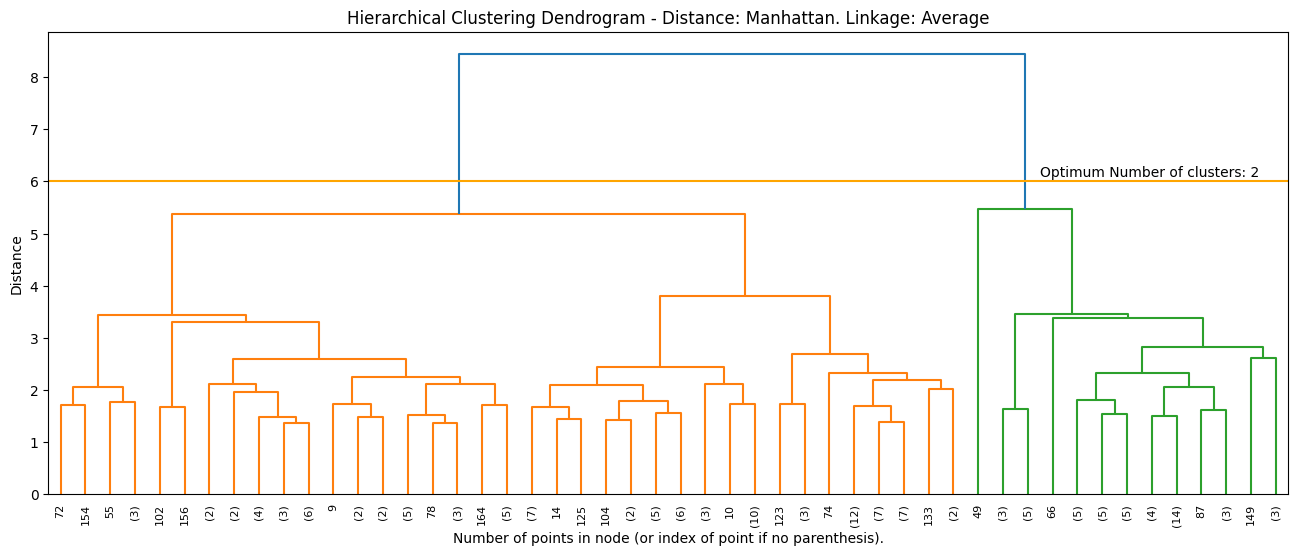

In [145]:
hac = AgglomerativeClustering(n_clusters=None, distance_threshold=0, affinity='manhattan', linkage='average')
hac.fit(slct_ds_scld)
plot_dendrogram(hac,dend_title='Hierarchical Clustering Dendrogram - Distance: Manhattan. Linkage: Average',\
                x_line=range(600), y_line=np.full((600,), 6), x_text=400, y_text=6.1, text='Optimum Number of clusters: 2')

Using the Manhattan distance produced very similar results as using the Euclidean Distance (Ward linkage is supported only with the Euclidean distance).  

### DBSCAN <a name=dbscan></a>

I'll now use on the same dataset (using only the selected features) DBSCAN algorithm to see if I can obtain better results, that is 4 or more than 4 not-overlapping clusters.  
I'll train DBSCAN using several values for the following algorithm hyper-parameters:
* the radius of the neighborhood where to look for the cluster points (eps)
* the minimum number of points each observation need to have within the radius distance to be a cluster core point
* Distance metric: Euclidean or Manhatthan distance

In [146]:
radius = np.arange(0.5, 10, 0.05)
min_obs = range(5,61)
distances = ['euclidean', 'manhattan']
dbscan_perf = {'Distance':[], 'Radius':[], 'Min_Points':[], 'N_Cluster':[], 'Silhouette_Coefficient':[]}

for d in distances: 
    for r in radius:
        for m in min_obs:
            dbs = DBSCAN(eps=r, min_samples=m, metric=d)
            dbs.fit(slct_ds_scld)
            #bc_data['cluster'] = dbs.labels_
            dbscan_perf['Distance'].append(d)
            dbscan_perf['Radius'].append(r)
            dbscan_perf['Min_Points'].append(m)
            dbscan_perf['N_Cluster'].append(len(np.unique(dbs.labels_)))
            try:
                dbscan_perf['Silhouette_Coefficient'].append(silhouette_score(slct_ds_scld, dbs.labels_))
            except:
                dbscan_perf['Silhouette_Coefficient'].append(np.nan)
    
dbscan_perf = pd.DataFrame(dbscan_perf)

In [147]:
np.sort(dbscan_perf['N_Cluster'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [148]:
print("Greatest Silhouette Coeffiecient per Number of Clusters:")
dbscan_perf.groupby(['N_Cluster'], as_index=True)[['Silhouette_Coefficient']].max().loc[2:]

Greatest Silhouette Coeffiecient per Number of Clusters:


Silhouette_Coefficient
N_Cluster                        
2                        0.479489
3                        0.405192
4                        0.359300
5                        0.270852
6                        0.188485
7                        0.127782
8                        0.029490
9                        0.054372
10                      -0.093637

The maximum number of clusters returned with DBSCAN is 10; however for N_Cluster equal to 10, the greatest obtained Silhouette Coefficient is negative, which indicates that samples have been assigned to the wrong clusters.  
The greatest Silhouette Coefficient for 9 and 8 clusters is very close to 0, which means the clusters may overlap.

Let's calculate the Silhouette Coefficient of the K-Means model (4 clusters) and compare it with the Silhouette Coefficients obtained by DBSCAN.

In [149]:
km = KMeans(init='k-means++', n_clusters=4, random_state=98)
km.fit(slct_ds_scld)
print('K-Means Silhouette Score (4 clusters):', silhouette_score(slct_ds_scld, km.labels_))

K-Means Silhouette Score (4 clusters): 0.3915992414305948


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


DBSCAN got higher Silhouette Scores only when clusters equal to 2 or 3. Let's have a look at the best 2 and 3 clusters found by DBSCAN.

In [150]:
dbscan_perf[dbscan_perf['N_Cluster'] == 2].sort_values('Silhouette_Coefficient', ascending=False).head(1)

Distance  Radius  Min_Points  N_Cluster  Silhouette_Coefficient
13719  manhattan     3.2          60          2                0.479489

In [151]:
dbs = DBSCAN(eps=3.2, min_samples=60, metric='manhattan')
dbs.fit(slct_ds_scld)
np.unique(dbs.labels_, return_counts=True)

(array([-1,  0]), array([ 47, 120]))

In [152]:
dbscan_perf[dbscan_perf['N_Cluster'] == 3].sort_values('Silhouette_Coefficient', ascending=False).head(1)

Distance  Radius  Min_Points  N_Cluster  Silhouette_Coefficient
12970  manhattan    2.55          39          3                0.405192

In [153]:
dbs = DBSCAN(eps=2.55, min_samples=39, metric='manhattan')
dbs.fit(slct_ds_scld)
np.unique(dbs.labels_, return_counts=True)

(array([-1,  0,  1]), array([  4, 119,  44]))

One of the DBSCAN label is actually not a cluster, but the group of samples classified as outliers by the DBSCAN algorithm. Therefore:
* N_Cluster = 2. The actual number of clusters is 1, with 120 countries belonging to this one cluster and 47 countries (28% of all samples) classified as outliers.
* N_Cluster = 3. The actual number of clusters is 2, with 119 countries belonging to 1 cluster, 44 belonging to the 2nd cluster,  and 4 countries (2.4%) classified as outliers.

Although DBSCAN got higher Silhouette Scores when N_Cluster = 2 or 3, clustering the countries in only 1 or 2 clusters (+ outliers) is of no or very little value for the scope of this analysis. Furthermore, K-Means' Silhouette Coefficient (No of Cluster = 4) is very close to DBSCAN Silhouette Coefficient (No of Cluster = 2 + outliers).

**We can conclude that K-Means performed better than either Agglomerative Hierarchical Clustering or DBSCAN, managing to cluster our data points in 4 distinct clusters, using a subset of the original data features selected by analyzing the cluster difference/overlap per each variable through a boxplot analysis.**

## Results <a name=results></a>

In [154]:
# Create the clusters
km = KMeans(init='k-means++', n_clusters=4, random_state=98)
km.fit(slct_ds_scld)
km_cluster = pd.DataFrame(slct_ds_scld, index=slct_ds.index, columns=slct_ds.drop('cluster',axis=1).columns)
km_cluster['cluster'] = km.labels_
km_cluster.tail()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


child_mort    income  life_expec  total_fer      gdpp  cluster
country                                                                  
Vanuatu      0.272908 -0.936370   -0.989652   0.695901 -0.335557        1
Venezuela   -0.220145  0.444224    0.484259  -0.054573  0.677068        3
Vietnam      0.064298 -0.620702    0.154567  -0.602928 -0.884232        1
Yemen        0.871019 -0.622412   -0.536860   1.227490 -0.884232        2
Zambia       1.212284 -0.857910   -1.779016   1.457080 -0.811543        2

In [155]:
# Reduce the dimension to 2 components to visualize clusters on a 2d plot
pca = PCA(n_components=2)
pca_data = pca.fit_transform(km_cluster.iloc[:,:-1])
pca_data = pd.DataFrame(pca_data, index=slct_ds.index, columns=['1st Principal Component', '2nd Principal Component'])
pca_data['cluster'] = km.labels_
pca_data.head()

1st Principal Component  2nd Principal Component  cluster
country                                                                       
Afghanistan                         3.214473                 0.149480        2
Albania                            -0.762240                -0.854788        3
Algeria                            -0.146943                 0.288264        1
Angola                              2.228676                 1.275362        2
Antigua and Barbuda                -1.324310                 0.088376        3

In [156]:
# Create dataframe for Cluster Cardinality 
cluster_size = km_cluster.groupby(['cluster'], as_index=False)['cluster'].count()
cluster_size.rename(columns={'cluster':'size'}, inplace=True)
cluster_size['cluster'] = [0,1,2,3]
cluster_size

size  cluster
0    35        0
1    38        1
2    45        2
3    49        3

In [157]:
# Create dataframe for Cluster Magnitude
cluster_magnitude = {'Cluster':[], 'Magnitude':[]}
for c in range(len(km.cluster_centers_)):
    cluster_magnitude['Cluster'].append(c)
    cluster_magnitude['Magnitude'].append(np.sqrt(((km_cluster[km_cluster['cluster']==c].iloc[:,:-1]\
                                                    - km.cluster_centers_[c])**2).sum(axis=1).sum()))
                                 
cluster_magnitude = pd.DataFrame(cluster_magnitude)
cluster_magnitude 

Cluster  Magnitude
0        0   4.457708
1        1   6.378262
2        2   5.989411
3        3   6.321605

In [160]:
# Create dataframe for Cardinality vs Magnitude
cluster_metric = pd.concat([cluster_magnitude, cluster_size['size']], axis=1)
cluster_metric

Cluster  Magnitude  size
0        0   4.457708    35
1        1   6.378262    38
2        2   5.989411    45
3        3   6.321605    49

**Results:**
1. The 4 clusters have approximately same size. So we don't have major outliers when it comes to the number of observations per cluster.
2. Cluster 1 is the smallest in terms of both cardinality and magnitude (sum of distances from all examples to the centroid of the cluster).
3. A higher cluster cardinality tends to result in a higher cluster magnitude, which intuitively makes sense: since magnitude is the sum of the distances from all examples to the cluster's centroid, the greater the number of examples, the greater the magnitude. However, if we observe the Magnitude vs Cardinality Regression Plot, we can see that Cluster 0's cardinality doesn't correlate with magnitude relatively to the other clusters (it's the data point furthest away from the fitting line). In fact, Cluster 0 is the cluster with the greatest magnitude, but it's not the biggest cluster.
4. Cluster 0 anomaly (in terms of Cardinality vs Magnitude) is probably due to the presence of an outlier, which increase the cluster magnitude:

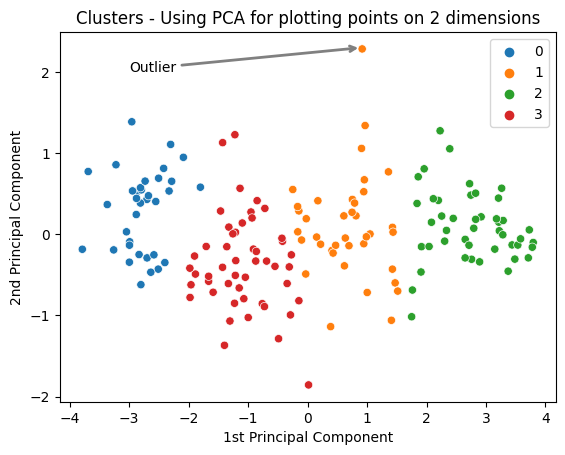

In [165]:
sns.scatterplot(data=pca_data, x='1st Principal Component', y='2nd Principal Component', hue='cluster',
                 palette='tab10')
plt.legend(loc='best')
plt.annotate('Outlier',
              xy=(0.9,2.3),
              xytext=(-3,2),
              arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='gray', lw=2))
plt.title('Clusters - Using PCA for plotting points on 2 dimensions')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.show()

In [166]:
#Let's have a look at the outlier - Cluster 0
pca_data[pca_data['2nd Principal Component'] > 2].index

Index(['Equatorial Guinea'], dtype='object', name='country')

Besides Cluster 0 being slightly anomalous compared to the other clusters, we can conclude that K-Means did a very good job in clustering the data points in 4 distinct clusters.

## Cluster description <a name=discussion></a>

In [167]:
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

In [170]:
import numpy as np
import plotly.graph_objects as go

attributes = km_cluster.columns[:5]

fig = go.Figure()

# Loop through each cluster to add traces
for cluster in range(4):  # Assuming you have 4 clusters
    cluster_data = km_cluster.loc[km_cluster.cluster == cluster, attributes]
    if not cluster_data.empty:
        r = np.mean(cluster_data, axis=0).tolist()
        fig.add_trace(go.Scatterpolar(
            r=r,
            theta=attributes,
            fill='toself',
            fillcolor=['blue', 'orange', 'green', 'red'][cluster],
            opacity=0.4,
            name=f'Cluster {cluster}'
        ))

fig.update_layout(polar=dict(radialaxis=dict(visible=True)),
                  showlegend=True,
                  title="Radar plot - Cluster attributes (Normalized Values)")
fig.show()


1. **Cluster 1**: countries with the highest values in Income, Life Expectancy, GDP per capita, and lowest values in Child Mortality and Total Fertility. We can label these countries as "**Highly developed**".
2. **Cluster 3**: these countries have lower values than the Highly Developed observations in Income, Life Expectancy, GDP per capita but still above the overall average. Also have higher values than cluster 1 in Child Mortality and Total Fertility, however below the dataset average. We can label these countries as "**Upper-middle developed**".
3. **Cluster 0**: countries with Income, Life Expectancy, GDP per capita mean values below the average, and Child Mortality and Total Fertility mean values above the average. We can label these countries as "**Lower-middle developed**".
4. **Cluster 2**: countries with, by far, the highest values in Child Mortality and Total Fertility as well as the smallest values in Income, Life Expectancy, and GDP per capita. We can label these countries as the "**Least developed**".

In [172]:
df['cluster'] = km.labels_
df['label'] = None

df.loc[df['cluster'] == 0, 'label'] = 'Lower-middle developed'
df.loc[df['cluster'] == 1, 'label'] = 'Highly developed'
df.loc[df['cluster'] == 2, 'label'] = 'Least developed'
df.loc[df['cluster'] == 3, 'label'] = 'Upper-middle developed'
df.head()

child_mort  exports  health  imports  income  inflation  \
country                                                                        
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   

                     life_expec  total_fer   gdpp  cluster  \
country                                                      
Afghanistan                56.2       5.82    553        2   
Albania                    76.3       1.65   4090        3   
Algeria                    76.5       2.89   4460        1   
Angola                     60.1       6.16   3530        2   
Antigua and Barbuda        76.8       2.13  12200        3   

                                      label  
country                                      
Afghanistan                 Least developed  
Albania              Upper-middle developed  
Algeria                    Highly developed  
Angola                      Least developed  
Antigua and Barbuda  Upper-middle developed

In [173]:
cluster_ds = df.groupby(['cluster','label'], as_index=True).mean()
cluster_ds.T

cluster                         0                1               2  \
label      Lower-middle developed Highly developed Least developed   
child_mort               4.942857        37.492105       92.606667   
exports                 58.237143        40.108132       26.557556   
health                   8.808286         5.701579        6.340222   
imports                 50.740000        45.378050       43.857778   
income               46257.142857      8827.631579     2180.733333   
inflation                2.733714         8.968974       11.678333   
life_expec              80.260000        68.707895       59.700000   
total_fer                1.762000         2.980263        5.015556   
gdpp                 43234.285714      4090.421053      990.844444   

cluster                         3  
label      Upper-middle developed  
child_mort              12.777551  
exports                 43.014286  
health                   6.693061  
imports                 48.097959  
income               16542.448980  
inflation                6.888571  
life_expec              75.026531  
total_fer                1.871224  
gdpp                  9220.204082

In [174]:
cluster_ds.describe().T

count          mean           std          min          25%  \
child_mort    4.0     36.954795     39.609438     4.942857    10.818878   
exports       4.0     41.979279     12.996411    26.557556    36.720488   
health        4.0      6.885787      1.345751     5.701579     6.180561   
imports       4.0     47.018447      3.038423    43.857778    44.997982   
income        4.0  18451.989187  19443.550266  2180.733333  7165.907018   
inflation     4.0      7.567398      3.772245     2.733714     5.849857   
life_expec    4.0     70.923606      8.848370    59.700000    66.455921   
total_fer     4.0      2.907261      1.509440     1.762000     1.843918   
gdpp          4.0  14383.938823  19530.643933   990.844444  3315.526901   

                     50%           75%           max  
child_mort     25.134828     51.270746     92.606667  
exports        41.561209     46.820000     58.237143  
health          6.516642      7.221867      8.808286  
imports        46.738005     48.758469     50.740000  
income      12685.040279  23971.122449  46257.142857  
inflation       7.928773      9.646314     11.678333  
life_expec     71.867213     76.334898     80.260000  
total_fer       2.425744      3.489086      5.015556  
gdpp         6655.312567  17723.724490  43234.285714

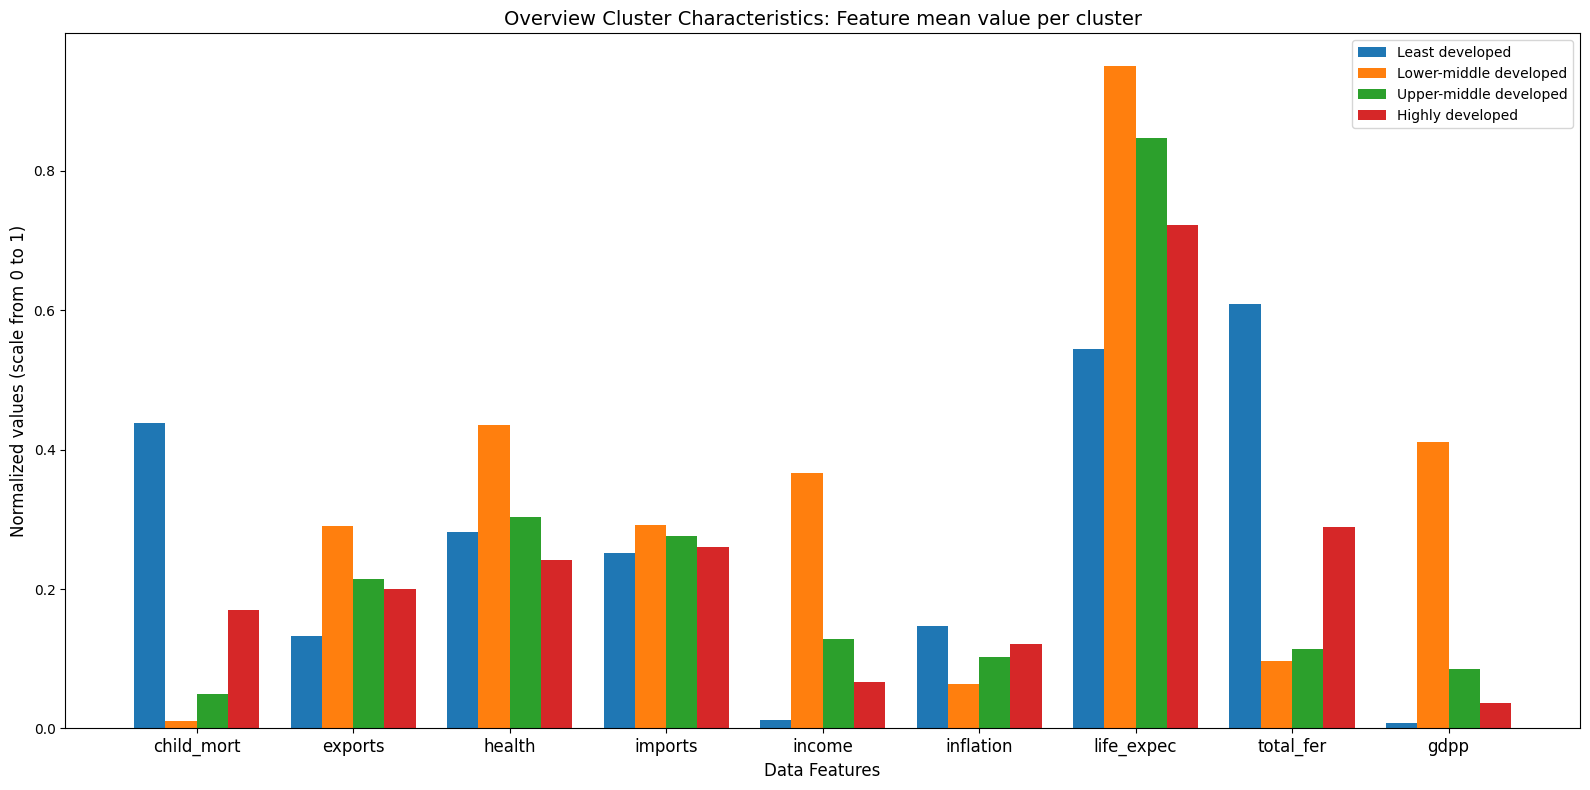

In [178]:
#Normalize the values with MinMax Scaler to plot features by cluster as clustered bar chart.
country_ds_norm = pd.DataFrame(MinMaxScaler().fit_transform(df[df.columns[:-2]]),
                               columns=df.columns[:-2])
country_ds_norm['cluster'] = km.labels_

group_ds = country_ds_norm.groupby(['cluster'], as_index=True).mean()
labels = cluster_ds.columns
cluster_0 = np.ravel(group_ds.loc[0].values)
cluster_1 = np.ravel(group_ds.loc[1].values)
cluster_2 = np.ravel(group_ds.loc[2].values)
cluster_3 = np.ravel(group_ds.loc[3].values)

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(16,8))
rects1 = ax.bar(x - width*1.5, cluster_2, width, label='Least developed')
rects2 = ax.bar(x - width/2, cluster_0, width, label='Lower-middle developed' )
rects3 = ax.bar(x + width/2, cluster_3, width, label='Upper-middle developed')
rects4 = ax.bar(x + width*1.5, cluster_1, width, label='Highly developed')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Normalized values (scale from 0 to 1)', fontsize=12)
ax.set_xlabel('Data Features', fontsize=12)
ax.set_title('Overview Cluster Characteristics: Feature mean value per cluster', fontsize=14)
ax.set_xticks(x, labels, fontsize=12)
ax.legend()

fig.tight_layout()
plt.show()

Main insights:
* It's interesting to note that the found clusters help find patterns also in those features that haven't been selected to train the clustering algorithm, such as Exports, Imports, and Inflation:
  * The more developed the countries, the higher the percentage of both Imports and Exports on the GDP per capita
  * The Highly Developed country group is the only one with an Export value greater than the Import value, suggesting that, besides single country differences and specific characteristics, well developed economies tend to have a positive trade balance. It'd be interesting to perform Hypothesis Testing Analysis to assess whether the difference between Highly Developed countries' trade balance and the population average is statistically significant or not.
  * The more developed the countries the lesser the level of Inflation.
  * Health (total health-related spending per capita, given as % of GDP per capita) is the only feature that doesn't seem to have neither an explanatory value on the clustering, nor being explained by the clusters.  
* For some features, the gap between one cluster and the others is particularly pronounced:
  * The Least Developed Countries have a very high level of Child Mortality, compared to all other clusters: 95 children (under 5 years of age) per 1,000 live births vs 38 children per 1,000 live births as inter-clusters' average, as well as a very high level of Total Fertility: 5.12 new borns per woman vs 2.93 born children per woman as inter-clusters' average (2.42 as median value).
  * The above point suggests a very important action point NGOs could undertake to help reduce the gap between the Least Developed countries and the others: reduce the level of Child Mortality will help reduce the level of Total Fertility as well (the features are highly correlated), and decrease the distance between this cluster and the other groups on the development scale.
  * Highly Developed countries have a much greater value of GDPP (Gross Domestic Product per Capita) and Income compared to the other clusters: 43,234 USD vs 14,345 USD as inter-cluster average (6,570 USD as median value); Highly Developed countries' Income mean value is 46,257 USD per person vs 18,369 USD per person as inter-cluster average (12,521 USD as median value).
  * This confirms the picture of a highly polarized world, where wellness and high-standard of living are not equally distributed but still a privilege of the few. NGOs should focus their efforts helping the Least Developed countries reduce their child mortality rate, and support policies that tend to foster economic growth, which will result in an increase of the GDPP as well as Income rates:
    * reduce trade deficit
    * control the level of inflation
    * improve fiscal/monetary policies
    * incentive privatisation
    * incentive free trade agreements
    * improve education system and local infrastructure
    * increase real wages (whilst keeping inflation under control)

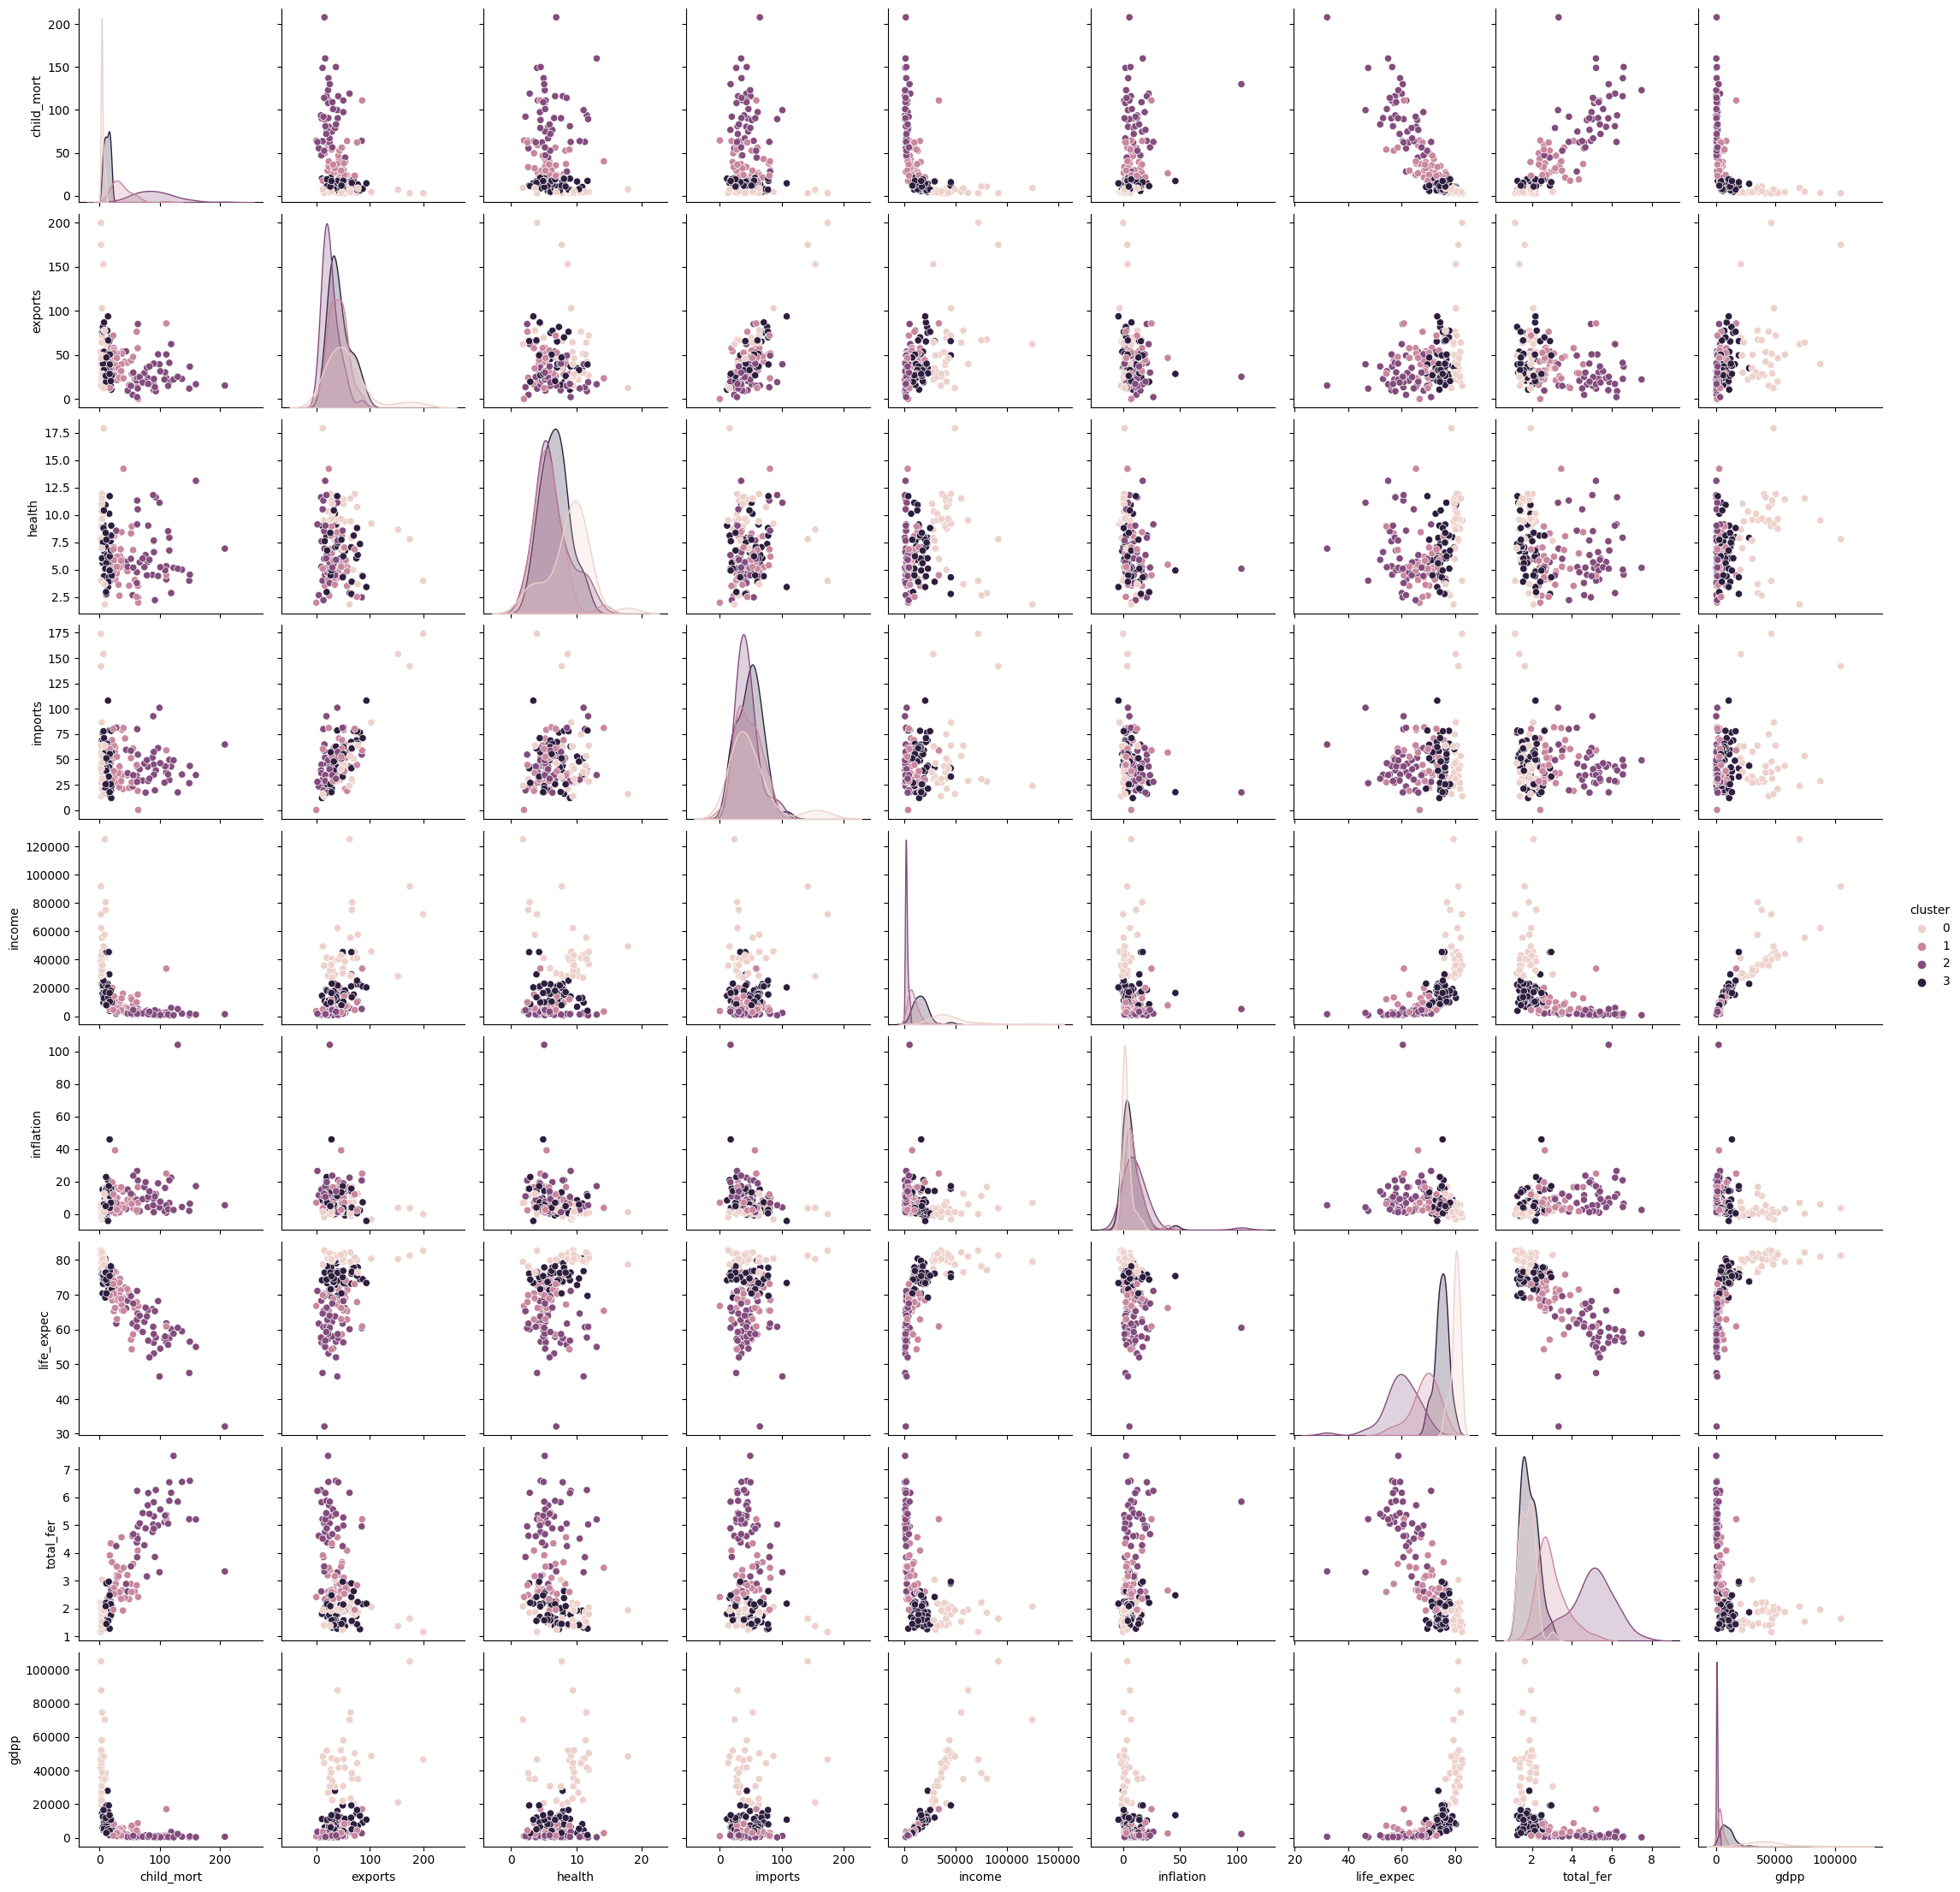

In [ ]:
sns.pairplot(df, hue='cluster')
plt.show()

### Outcome of the analysis <a name=outcome></a>

K-Means clustered the 167 countries included in the dataset into the following categories: 
1. **Cluster 1 - Highly developed**: countries with the highest values in Income, Life Expectancy, GDP per capita, and lowest values in Child Mortality and Total Fertility.
2. **Cluster 3 - Upper-middle developed**: Income, Life Expectancy, GDP per capita mean values are smaller than the Highly developed countrie's average, but above the population average. Child Mortality and Total Fertility means values are greater then cluster 1 mean values, however still below the dataset average.
3. **Cluster 0 - Lower-middle developed**: countries with Income, Life Expectancy, GDP per capita mean values below the average, and Child Mortality and Total Fertility mean values above the average.
4. **Cluster 2 - Least developed**: countries with, by far, the highest values in Child Mortality and Total Fertility as well as the smallest values in Income, Life Expectancy, and GDP per capita.

In [183]:
# Prepare data for Geo visualization
km_cluster['cluster_label'] = None
km_cluster.loc[km_cluster['cluster'] == 0, 'cluster_label'] = 'Lower-Middle Developed'
km_cluster.loc[km_cluster['cluster'] == 1, 'cluster_label'] = 'Highly Developed'
km_cluster.loc[km_cluster['cluster'] == 2, 'cluster_label'] = 'Least Developed'
km_cluster.loc[km_cluster['cluster'] == 3, 'cluster_label'] = 'Upper-Middle Developed'

# Display a Choropleth Map with plotly.express
country_info = r'world_countries.json'
fig = px.choropleth_mapbox(km_cluster,
                           geojson=country_info,
                           featureidkey='properties.name',
                           locations=km_cluster.index,
                           color='cluster_label',
                           labels={'cluster_label': ''},
                           category_orders={'cluster_label': ['Least developed',
                                                              'Lower-middle developed',
                                                              'Upper-middle developed',
                                                              'Highly developed']},
                           
                           opacity=0.8,
                           mapbox_style="carto-positron",
                           zoom=0.85,
                           center = {"lat": 40.2085, "lon": -3.7135},
                           title='')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                  legend=dict(orientation="h", yanchor="top", y=1.06, xanchor="left", x=-0.05))
fig.show()

In [184]:
def cluster_descr(cluster):
    print('List of {} countries:'.format(km_cluster[km_cluster['cluster'] == cluster]['cluster_label'].values[0]))
    print(km_cluster[km_cluster['cluster'] == cluster].index.tolist())
    print('')
    print('Number of {} countries: '.format(km_cluster[km_cluster['cluster'] == cluster]['cluster_label'].values[0]),
          len(km_cluster[km_cluster['cluster'] == cluster].index))
    
cluster_descr(1)

List of Highly Developed countries:
['Algeria', 'Azerbaijan', 'Bangladesh', 'Belize', 'Bhutan', 'Bolivia', 'Botswana', 'Cape Verde', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Fiji', 'Gabon', 'Guatemala', 'Guyana', 'India', 'Indonesia', 'Iraq', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Micronesia, Fed. Sts.', 'Mongolia', 'Morocco', 'Myanmar', 'Namibia', 'Paraguay', 'Philippines', 'Samoa', 'South Africa', 'Suriname', 'Tonga', 'Turkmenistan', 'Uzbekistan', 'Vanuatu', 'Vietnam']

Number of Highly Developed countries:  38


In [185]:
cluster_descr(3)

List of Upper-Middle Developed countries:
['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Bahamas', 'Barbados', 'Belarus', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Estonia', 'Georgia', 'Grenada', 'Hungary', 'Iran', 'Jamaica', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius', 'Moldova', 'Montenegro', 'Oman', 'Panama', 'Peru', 'Poland', 'Romania', 'Russia', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Slovak Republic', 'Sri Lanka', 'St. Vincent and the Grenadines', 'Thailand', 'Tunisia', 'Turkey', 'Ukraine', 'Uruguay', 'Venezuela']

Number of Upper-Middle Developed countries:  49


In [186]:
cluster_descr(0)

List of Lower-Middle Developed countries:
['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Qatar', 'Singapore', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States']

Number of Lower-Middle Developed countries:  35


In [187]:
print('These are the countries at the bottom of the development curve:')
cluster_descr(2)

These are the countries at the bottom of the development curve:
List of Least Developed countries:
['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Eritrea', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia']

Number of Least Developed countries:  45


**Note** - the below countries were excluded from this analysis because they were not part of the dataset:  
Cuba, Djibouti, Ethiopia, Eswatini, Falkland Is., Gaza Strip, Greenland, Honduras, Kososvo, Mexico, Nicaragua, North Korea, Palestine, New Caledonia, Papua New Guinea, Perto Rico, Somalia, Somaliland, South Sudan, Syria, Taiwan, Trinidad and Tobago, West Bank, West Sahara, Zimbabwe.

### Potential developments <a name=developments></a>

1. It'd be interesting to include in the analysis those countries that weren't included in the dataset.
2. As observed, the "Highly Developed Countries" cluster is the only group with a mean positive trade balance. Since Imports and Exports were not included in the selected features to train the model, it'd be interesting to perform Hypothesis Testing Analysis to assess whether the difference between Highly Developed countries' trade balance and the population average is statistically significant or not.
3. Include more significant features could help cluster the countries in more distinct groups, providing more insights into the data.   
4. Record countries data and perform this type of analysis on a periodical basis will be very useful to record countries' change of status over time, and what drove that change.